In [1]:
import matplotlib
import matplotlib.pylab as plt

In [2]:
import json
import os
import random
import shutil
import time
from importlib import import_module

import numpy as np


In [3]:
# 设置全局的字体大小为12
matplotlib.rcParams['font.size'] = 32

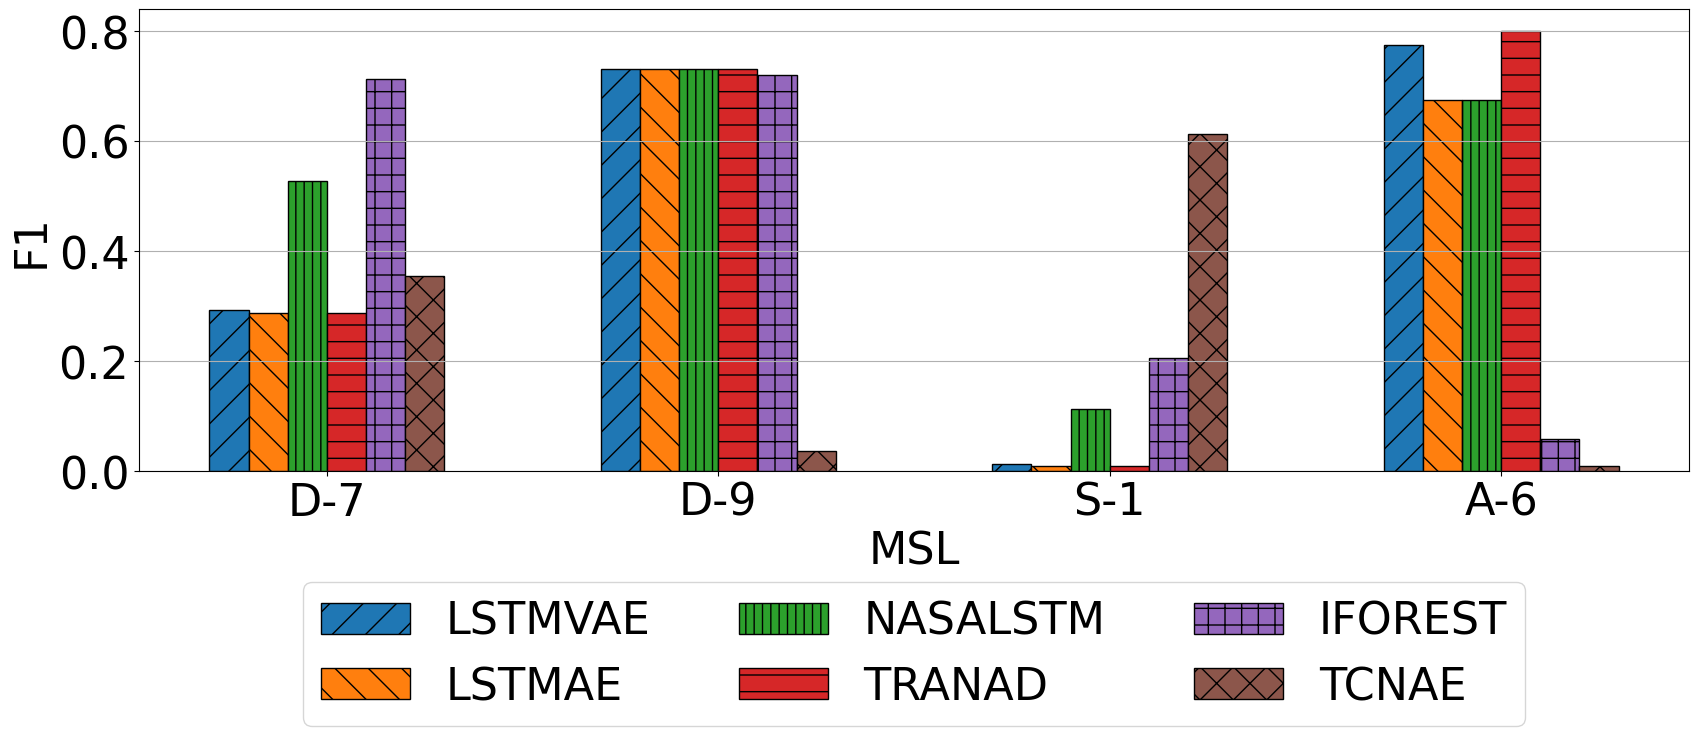

In [7]:
# matplotlib.use('Agg')

# import pdfmatte
# pdfmatte.activate()
# 方法和数据
methods = ['LSTMVAE', 'LSTMAE', 'NASALSTM', 'TRANAD', 'IFOREST', 'TCNAE']
data = {
    'D-7': [0.29337712096332785, 0.2870826491516147, 0.5265835665225134, 0.2870826491516147, 0.7126405264601042, 0.3548895899053628],
    'D-9': [0.7317854283426741, 0.7317854283426741, 0.7317854283426741, 0.7317854283426741, 0.7200956937799043, 0.036193574623830826],
    'S-1': [0.01221264367816092, 0.008935219657483246, 0.11308861698183166, 0.008935219657483246, 0.20605069501226492, 0.6128318584070797],
    'A-6': [0.775, 0.675, 0.675, 0.8, 0.058823529411764705, 0.009051821679112922]
}

patterns = ['/', "\\" , '||',"-",'-|',"\\/"]
# 绘制柱状图
fig, ax = plt.subplots(figsize=(20, 6))
bar_width = 0.1
index = range(len(data))
colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
for i, method in enumerate(methods):
    values = [data[key][i] for key in data]
    bars = plt.bar([p + bar_width*i for p in index], values, bar_width, label=method,color=colors[i],edgecolor='k')
    for bar, pattern in zip(bars, patterns):
        bar.set_hatch(patterns[i])

# 设置 x 轴标签和标题
plt.xlabel('MSL')
plt.ylabel('F1')
plt.title('')
plt.grid(axis='y')
plt.xticks([p + 2.5*bar_width for p in index], data.keys())
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncol=3)
plt.savefig("method-dataset-compare.pdf", bbox_inches='tight',dpi=600)
plt.show()

In [39]:
def getEvaluationResult(mode = "old",dataset_list = [],method_list = []):
    path = "../Logs/recommondation/" + mode +"/"
    result = {}
    for dataset,isonly in dataset_list:

        result[dataset] = {}

        files_path = path + dataset

        file_names = os.listdir(files_path)

        for file_name in file_names:
            file_name = file_name.split(".")[0]
     
            result[dataset][file_name] = {}

            for method in method_list:
        
                eval_path = files_path + "/" + file_name + "/" + method + ".json"
         
                with open(eval_path, "r") as file:
                    data_dict = json.load(file)

                result[dataset][file_name][method] = data_dict["ori_f1"]
    

    return result


In [253]:


res = getEvaluationResult(mode="old",dataset_list=[("SMD",False)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["SMD"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)
    print("filename:",filename)
    print(sorted_res)
    sorted_method.append(sorted_res)


    

filename: machine-1-1
[('DAGMM', 0.2233468286099865), ('TRANSFORMER', 0.2188778492109877), ('LSTMV2', 0.19299343134188301), ('IForestAD', 0.19003979259616544), ('OmniAnomaly', 0.15553435114503816), ('TRANAD', 0.15530142594945645), ('LSTMVAE', 0.14584129410266208), ('LSTMAE', 0.13342409802586794), ('TCNAE', 0.10238964487222038), ('UAE', 0.012991833704528583), ('PCAAD', 0.009618941916389198)]
filename: machine-1-2
[('TRANAD', 0.3447761194029851), ('LSTMVAE', 0.3376251788268956), ('LSTMAE', 0.3328591749644381), ('OmniAnomaly', 0.3254847645429363), ('LSTMV2', 0.2674897119341564), ('DAGMM', 0.2619047619047619), ('TRANSFORMER', 0.20334507042253522), ('IForestAD', 0.07539118065433854), ('UAE', 0.041237113402061855), ('PCAAD', 0.031506849315068496), ('TCNAE', 0.02099827882960413)]
filename: machine-1-3
[('TRANSFORMER', 0.16299559471365638), ('UAE', 0.15324384787472037), ('DAGMM', 0.11285814116002796), ('TRANAD', 0.1091652072387624), ('LSTMVAE', 0.10303300624442462), ('LSTMV2', 0.08794466403162

In [254]:
res = getEvaluationResult(mode="new",dataset_list=[("SMD",False)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["SMD"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)
    print("filename:",filename)
    print(sorted_res)
    sorted_method.append(sorted_res)

filename: machine-1-4
[('TRANAD', 0.21764705882352942), ('TRANSFORMER', 0.17973231357552583), ('DAGMM', 0.11703056768558952), ('LSTMVAE', 0.11320754716981132), ('LSTMV2', 0.11203319502074689), ('LSTMAE', 0.09489993544222079), ('UAE', 0.09379310344827586), ('OmniAnomaly', 0.08548168249660787), ('IForestAD', 0.061733128834355826), ('PCAAD', 0.0067842605156037995), ('TCNAE', 0.0065830721003134795)]
filename: machine-1-5
[('UAE', 0.23140495867768596), ('DAGMM', 0.08791208791208792), ('TRANAD', 0.0847457627118644), ('LSTMAE', 0.07936507936507936), ('LSTMVAE', 0.07926829268292683), ('OmniAnomaly', 0.06896551724137931), ('LSTMV2', 0.06692913385826772), ('TRANSFORMER', 0.02663622526636225), ('PCAAD', 0.017391304347826087), ('IForestAD', 0.006996268656716418), ('TCNAE', 0.004074455309658604)]
filename: machine-2-1
[('TRANSFORMER', 0.21645796064400716), ('OmniAnomaly', 0.17314487632508835), ('DAGMM', 0.16447368421052633), ('LSTMAE', 0.16012596899224807), ('LSTMV2', 0.15712545676004872), ('LSTMVA

In [255]:

res = getEvaluationResult(mode="new",dataset_list=[("WADI",True)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["WADI"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)
    print("filename:",filename)
    print(sorted_res)
    sorted_method.append(sorted_res)

filename: WADI
[('UAE', 0.2995198079231693), ('OmniAnomaly', 0.29505524361528707), ('IForestAD', 0.2552675264972545), ('LSTMAE', 0.2483051973946564), ('TRANSFORMER', 0.24186666666666667), ('LSTMV2', 0.20349990979613927), ('TRANAD', 0.18125061936378953), ('DAGMM', 0.17701307639366828), ('LSTMVAE', 0.16818130820150343), ('PCAAD', 0.021135265700483092), ('TCNAE', 0.0)]


In [244]:

res = getEvaluationResult(mode="new",dataset_list=[("SWAT",True)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["SWAT"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)
    print("filename:",filename)
    print(sorted_res)
    sorted_method.append(sorted_res)

filename: SWAT
[('IForestAD', 0.7213506065143328), ('TRANSFORMER', 0.7185557408650827), ('OmniAnomaly', 0.7110767872903795), ('LSTMV2', 0.7110390326780079), ('TRANAD', 0.7109850825315562), ('LSTMAE', 0.7108247650147831), ('LSTMVAE', 0.7071683880446462), ('DAGMM', 0.578488845464908), ('TCNAE', 0.013140139365114479), ('PCAAD', 0.001061266001901435), ('UAE', 0.0004913794945200505)]


In [50]:
res = getEvaluationResult(mode="new",dataset_list=[("DMDS",True)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["DMDS"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)

    print(sorted_res)
    sorted_method.append(sorted_res)

[('DAGMM', 0.7732022587846837), ('TRANAD', 0.7212254570074476), ('OmniAnomaly', 0.7206452377325276), ('LSTMV2', 0.7205046678392639), ('LSTMVAE', 0.7203857215361191), ('LSTMAE', 0.7202058504875406), ('IForestAD', 0.7200270407300997), ('TRANSFORMER', 0.7200027062683941), ('UAE', 0.7170389170896785), ('PCAAD', 0.6552801127947029), ('TCNAE', 0.05941940627491441)]


In [258]:
res = getEvaluationResult(mode="new",dataset_list=[("SKAB",True)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["SKAB"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)

    print(sorted_res)
    sorted_method.append(sorted_res)

[('TCNAE', 0.41014799154334036), ('IForestAD', 0.3656400966183575), ('LSTMV2', 0.3520237653174898), ('PCAAD', 0.35197400807324997), ('LSTMAE', 0.35126818351361433), ('OmniAnomaly', 0.3498418436511523), ('LSTMVAE', 0.34839650145772594), ('TRANSFORMER', 0.34461649261793303), ('TRANAD', 0.3414611955236102), ('DAGMM', 0.3378646020885848), ('UAE', 0.09733270940570894)]


In [22]:
res = getEvaluationResult(mode="new",dataset_list=[("PMS",True)],method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"])
sorted_method = []
for filename, inner_dict in res["PMS"].items():
    sorted_res = sorted(inner_dict.items(), key=lambda x: x[1], reverse=True)

    print(sorted_res)
    sorted_method.append(sorted_res)

[('IForestAD', 0.41203598699629546), ('DAGMM', 0.3917796550010648), ('TRANSFORMER', 0.36127988275883127), ('TRANAD', 0.3565100154083205), ('LSTMVAE', 0.3561535417491096), ('LSTMAE', 0.35247352566690476), ('LSTMV2', 0.351559528337771), ('OmniAnomaly', 0.31978100600367065), ('UAE', 0.005663164806303349), ('TCNAE', 0.0024529844644317253), ('PCAAD', 0.0011495196649971263)]


In [260]:
def checkHolderExist(path):
    # 判断文件夹是否存在
    if not os.path.exists(path):
        # 如果文件夹不存在，则创建它
        os.makedirs(path)

In [261]:
from mpl_toolkits import axisartist

def colorTransform(r,g,b,a:float = 1.0):
    return (r/255,g/255,b/255,a)
    
def plotAllResult(x_axis,y_axises,title = "",labels = [],save_path = "",threshold = None,segments = [],isScore=True,f1_pair = []):
    plt.rcParams.update({'font.size': 14})  # 设置全局字体大小

    fig = plt.figure(dpi=300, figsize=(10, 5))
    for index in range(len(y_axises)):
        y_axis = y_axises[index]
        ax = axisartist.Subplot(fig, len(y_axises),1,index+1)
        # 将绘图区对象添加到画布中
        fig.add_axes(ax)

        if isScore:
            ax.plot(x_axis, y_axis, color=colorTransform(70, 130, 180), linewidth=0.8)
            isScore = False

            if threshold != None:
                ax.axhline(y=threshold, color=(0, 0, 0.9, 0.75), linestyle='--', linewidth=3)  # 使用红色虚线

        else:
            ax.plot(x_axis, y_axis, color=colorTransform(57, 136, 145), linewidth=0.8)
            for pair in f1_pair:
                ax.axvline(x=pair[0], color=colorTransform(131,136,186), linestyle='-.', linewidth=2)  # 使用红色虚线

        # if len(labels) > 0:
        #     ax.plot(x_axis, labels, color='red', label='label', linestyle='--',linewidth=2)

        if len(segments) > 0:
            for item in segments:
                ax.fill_betweenx([-1, 1.1], item[0], item[1], color=colorTransform(255, 228, 181, 0.8))
                # 添加垂直线
                # plt.axvline(x=item[0], ymin=-1, ymax=1, color='red', linestyle='--', linewidth=2)
                # plt.axvline(x=item[1], ymin=-1, ymax=1, color='red', linestyle='--', linewidth=2)



        # 设置x轴和y轴可见性
        ax.axis['top'].set_visible(False)
        ax.axis['right'].set_visible(False)
        ax.axis['bottom'].set_visible(True)
        ax.axis['left'].set_visible(True)

        ax.axis['left'].set_axisline_style("->", size=1.5)
        ax.axis['bottom'].set_axisline_style("->", size=1.5)

        ax.axis[:].line.set_linewidth(2)

        # 设置只显示x轴和y轴

        ax.xaxis.set_ticks_position('bottom')
        # 设置x轴和y轴的范围
        axis_xlim = list(range(1, len(x_axis) + 1))
        axis_xlim_length = len(axis_xlim)
        # ax.set_xlim(0, axis_xlim_length)

        # 设置x轴和y轴的刻度位置和标签
        ax.set_xticks([])
        ax.set_xticklabels([])

        y_ticklabels = ['0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

        if isScore:
            ax.yaxis.set_ticks_position('left')
            ax.set_yticks([0, 1])
            ax.set_ylim(0, 1)
            ax.set_yticklabels(["0", "1"])
        else:
            ax.set_yticks([0, 1])
            ax.set_ylim(0, 1)
            ax.set_yticklabels(["0", "1"])
    # 添加图例和标题
    # plt.legend(loc='upper right')
    # plt.title(title)
    plt.tight_layout()  # 调整子图布局
    plt.subplots_adjust(left=0.15, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.3)
    if save_path != "":
        plt.savefig(save_path)

    # 显示图表
    # plt.show()

In [262]:
import pandas as pd
import warnings

# 设置过滤器忽略 UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
def plotDataset(dataset,filename,mode = "train" ,label = None):

    base_path = "../Data/" + dataset + "/" + mode + "/"
    label_path =    "../Data/" + dataset + "/label/"
    data = pd.read_csv(base_path+filename,header=None)
    data = data.values

    label = pd.read_csv(label_path+filename,header=None)
    label = label.values


    channels = data.shape[-1]

    plot_yaxis = []
    for i in range(channels):
        print("index :",i)
        plot_yaxis.append(data[:,i])
        if i % 5 == 0:
            plot_path = "../Plots/Data/" + dataset + "/" + mode

            checkHolderExist(plot_path)
            plot_yaxis.append(label)
            plotAllResult(x_axis=np.arange(len(data)), y_axises=plot_yaxis, title="",
                          save_path=plot_path + "/" +  filename.split(".")[0] + "_" + str(i//5) + ".pdf",
                          segments=[],
                          threshold=None)
            plot_yaxis = []



In [263]:

#plotDataset("SMD","machine-1-2.txt",mode="test")


In [264]:

#plotDataset("SMD","machine-1-6.txt",mode="test")


In [265]:

#plotDataset("SMD","machine-1-7.txt",mode="test")

In [266]:

#plotDataset("SMD","machine-1-8.txt",mode="test")

In [267]:
#plotDataset("SMD","machine-1-1.txt",mode="test")

In [268]:


def minMaxScaling(data, min_value, max_value, range_min=0, range_max=1):
    """
    使用NumPy对数据进行最大最小归一化，手动指定数据的最大值和最小值。

    参数:
    data (NumPy array): 需要归一化的数据
    min_value (float): 数据的最小值
    max_value (float): 数据的最大值
    range_min (float): 归一化范围的最小值 (默认为0)
    range_max (float): 归一化范围的最大值 (默认为1)

    返回:
    归一化的NumPy一维数组
    """
    # 计算比例
    scale = (range_max - range_min) / (max_value - min_value + 1e-10)
    # 归一化
    normalized_data = scale * (data - min_value) + range_min

    return normalized_data


In [269]:
def plotOne(dataset,filename,mode = "train" ,startIndex = 0 ,endIndex = -1):

    base_path = "../Data/" + dataset + "/" + mode + "/"
    label_path =    "../Data/" + dataset + "/label/"
    data = pd.read_csv(base_path+filename,header=None)
    data = data.values
    data = data[:,0]
    data = data[startIndex:endIndex]
    data = minMaxScaling(data,data.min(),data.max())
    plt.plot(data)
    plt.xticks([])
    plt.yticks([])
    plt.show()



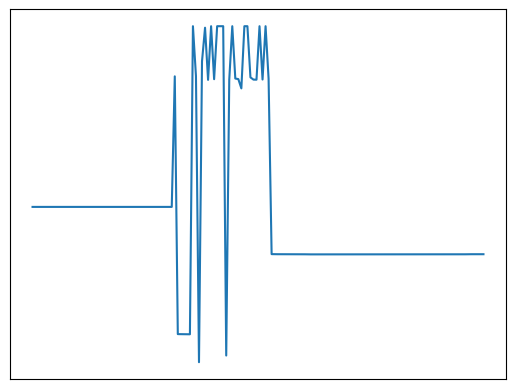

In [270]:
plotOne("SMAP","A-6.csv","test",1850,2000)

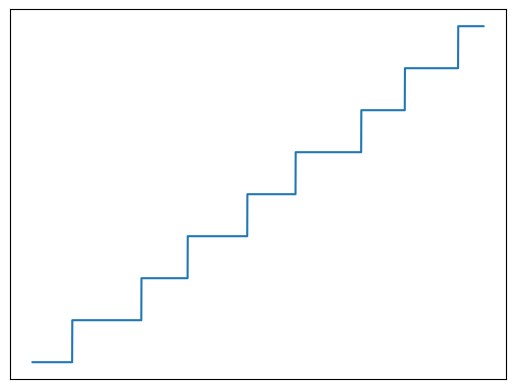

In [271]:
plotOne("SMAP","D-7.csv","test",4800,7500)

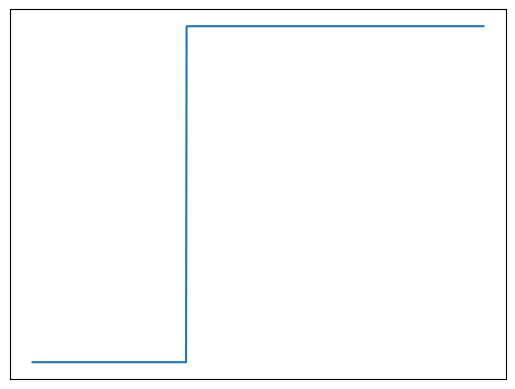

In [272]:
plotOne("SMAP","D-9.csv","test",6200,7000)

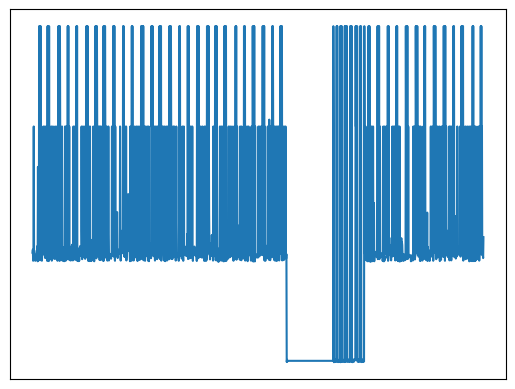

In [273]:
plotOne("SMAP","S-1.csv","test",4500,6000)

In [274]:
def platSMAP():

    fig, axs = plt.subplots(1, 4, figsize=(36, 8))
    path1 = "../Data/SMAP/test/A-6.csv"
    data1 = pd.read_csv(path1,header=None).values[:,0]
    print(data1.shape)
    data1 = data1[1850:2000]

    path2 = "../Data/SMAP/test/D-7.csv"
    data2 = pd.read_csv(path2,header=None).values[:,0]
    data2 = data2[4800:7500]

    path3 = "../Data/SMAP/test/D-9.csv"
    data3 = pd.read_csv(path3,header=None).values[:,0]
    data3 = data3[6200:7000]

    path4 = "../Data/SMAP/test/S-1.csv"
    data4 = pd.read_csv(path4,header=None).values[:,0]
    data4 = data4[4500:6000]
    plt.rcParams.update({'font.size': 24})  # 设置全局字体大小
    # 绘制第一个子图
    axs[0].plot(range(len(data1)), data1, linewidth=5,color="#4995C6")
    axs[0].set_title('A-6')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    for spine in axs[0].spines.values():
        spine.set_linewidth(2.5)
    
    # 绘制第二个子图
    axs[1].plot(range(len(data2)), data2, linewidth=5,color="#4995C6")
    axs[1].set_title('D-7')
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    for spine in axs[1].spines.values():
        spine.set_linewidth(2.5)
    
    # 绘制第三个子图
    axs[2].plot(range(len(data3)), data3, linewidth=5,color="#4995C6")
    axs[2].set_title('D-9')
    axs[2].set_xticks([])
    axs[2].set_yticks([])
    for spine in axs[2].spines.values():
        spine.set_linewidth(2.5)
            
    
    # 绘制第四个子图
    axs[3].plot(range(len(data4)), data4, linewidth=5,color="#4995C6")
    axs[3].set_title('S-1')
    axs[3].set_xticks([])
    axs[3].set_yticks([])
    for spine in axs[3].spines.values():
        spine.set_linewidth(2.5)
    # 调整子图之间的间距
    plt.tight_layout()

    
    plt.xticks([])
    plt.yticks([])

    plt.savefig("fig.png")
    plt.show()
    

(4453,)


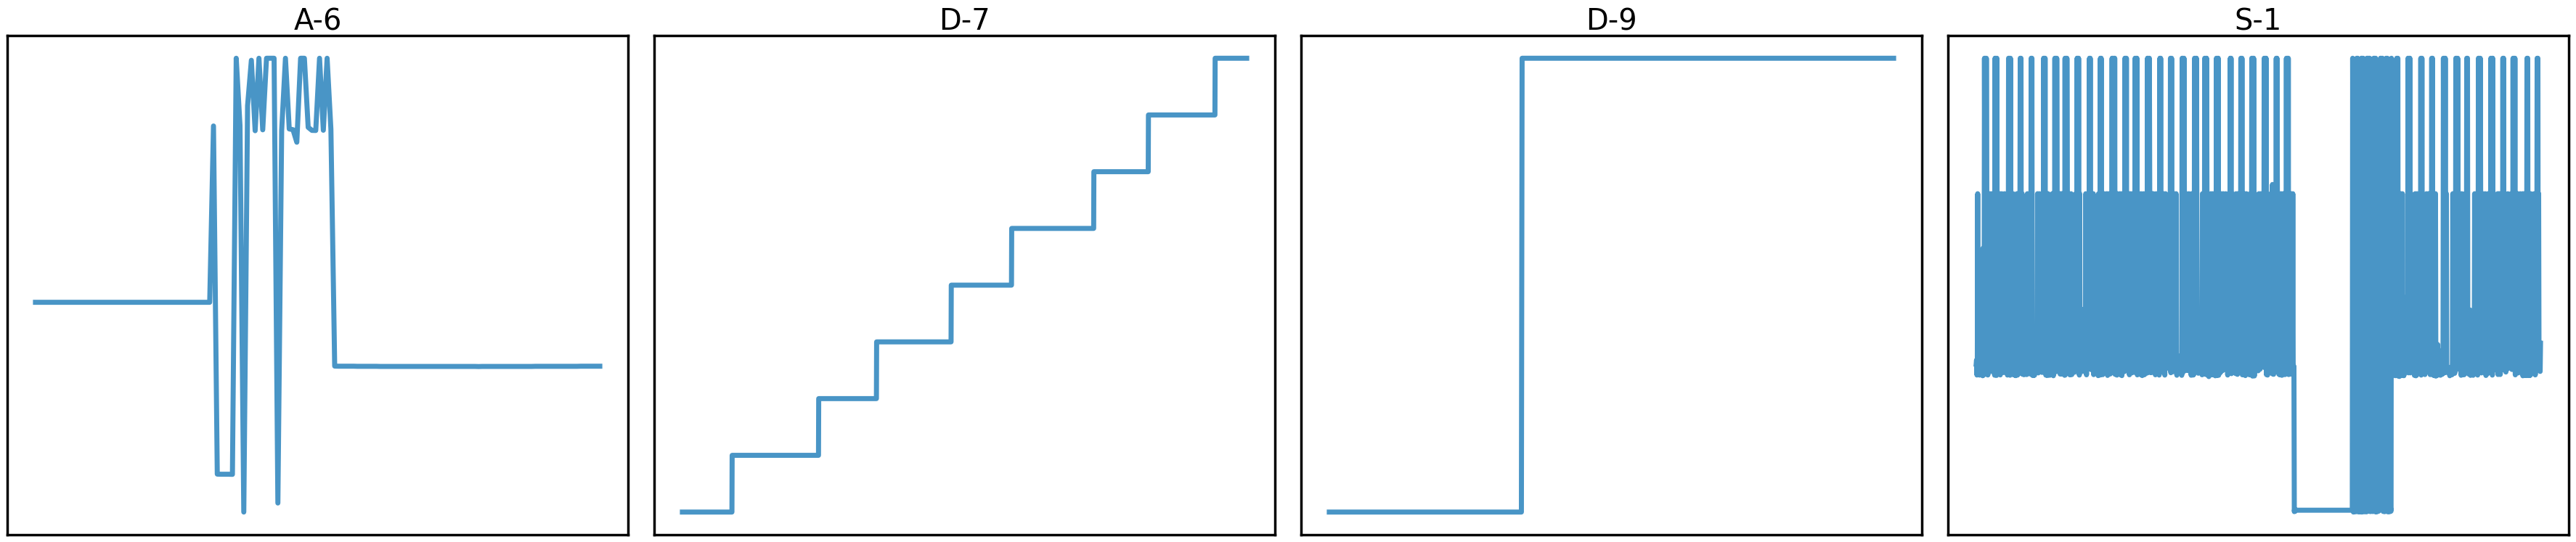

In [275]:
platSMAP()

In [276]:

def plotWADI(mode = "train" ):

    base_path = "../Data/WADI"+  "/" + mode + "/WADI.csv"
    data = pd.read_csv(base_path,header=None)
    data = data.values

    print("shape:",data.shape)
    channels = data.shape[-1]

    data = data[:,113]

    plt.figure(dpi=300, figsize=(20, 5))
    plt.plot(data[:300000],linewidth=2.5)

    plt.plot(data[900000:1200000] - 1 ,linewidth=2.5 )



    # 隐藏 X 轴和 Y 轴的标签
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False,
                    labelleft=False)

    plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5)
    plt.savefig("WADI.png")
    plt.show()

shape: (1209601, 127)


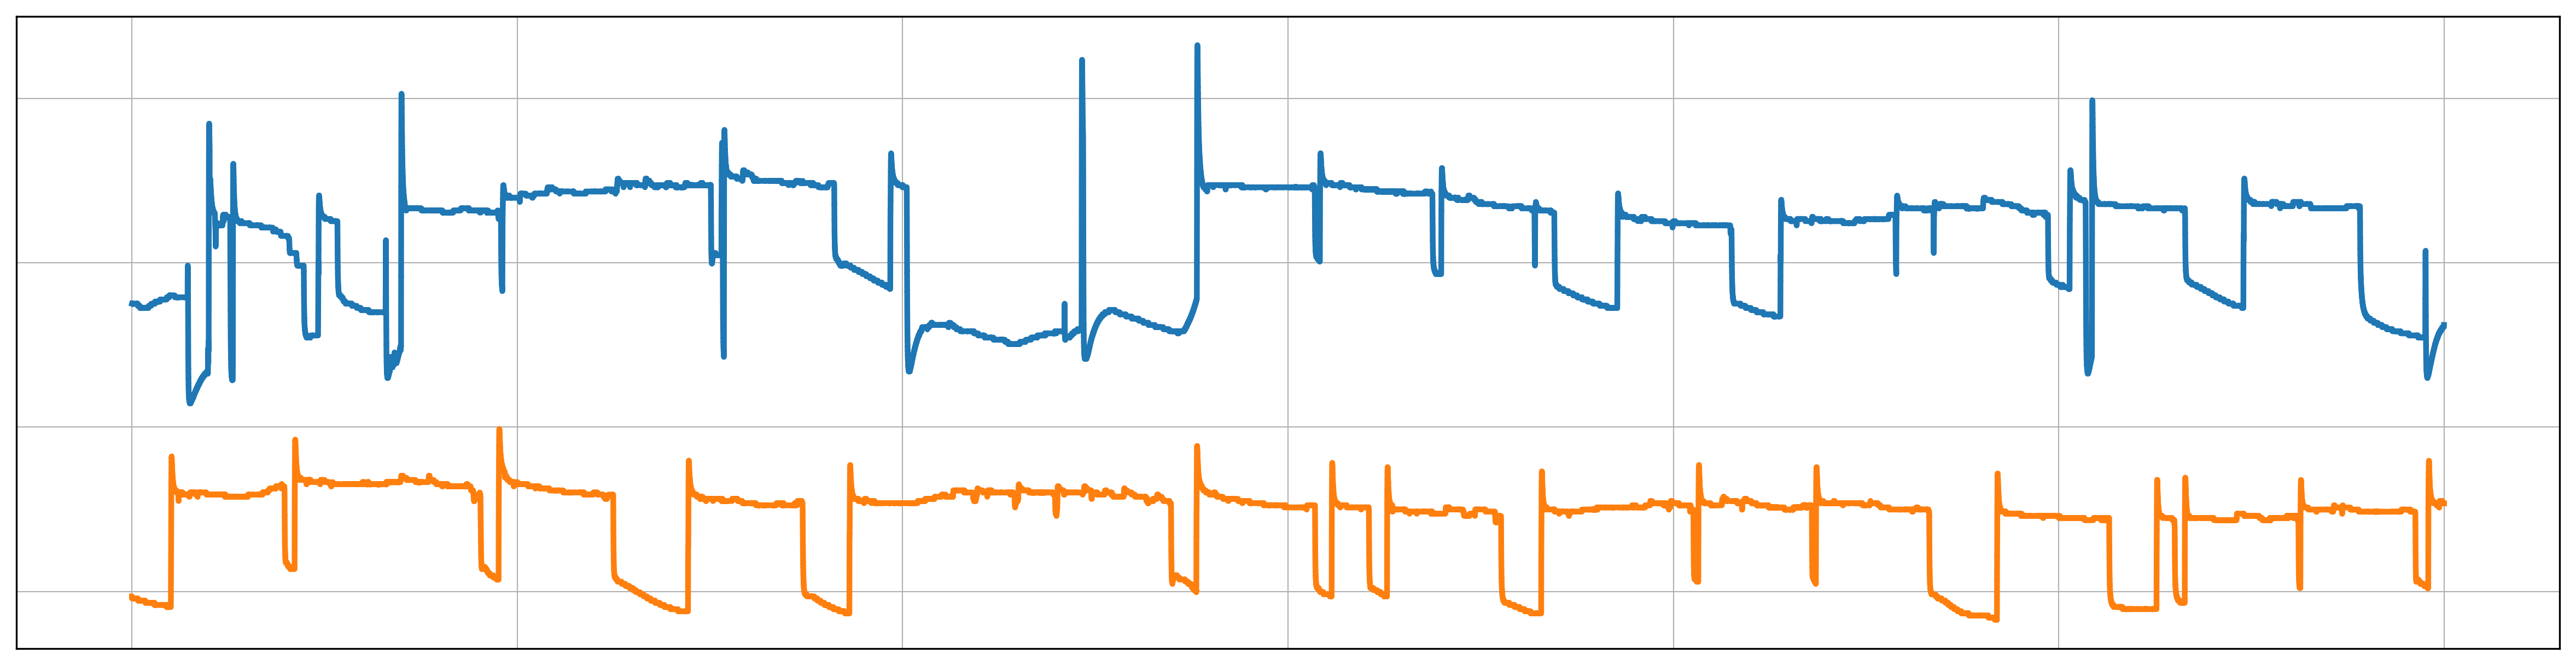

In [277]:
plotWADI("train")

In [278]:
def plotSMD():
    path1 = "../Data/SMD/test/machine-1-1.txt"
    path2 = "../Data/SMD/test/machine-1-2.txt"
    path3 = "../Data/SMD/test/machine-1-6.txt"
    path4 = "../Data/SMD/train/machine-1-7.txt"
    
    data = pd.read_csv(path1,header=None).values[:,0]
    
    data1 = data[3000:7000]
    data2 = data[7000:11000]

    data3 = data[11000:15000]
    data4 = data[15000:19000]


    plt.figure(dpi=300, figsize=(5, 5))
    plt.plot(data1 +2)
    plt.plot(data2 + 1)
    plt.plot(data3 )
    plt.plot(data4 - 1.5)

        # 隐藏 X 轴和 Y 轴的标签
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False,
                    labelleft=False)

    # plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5)
    plt.savefig("base1.png")
    plt.show()

    

    

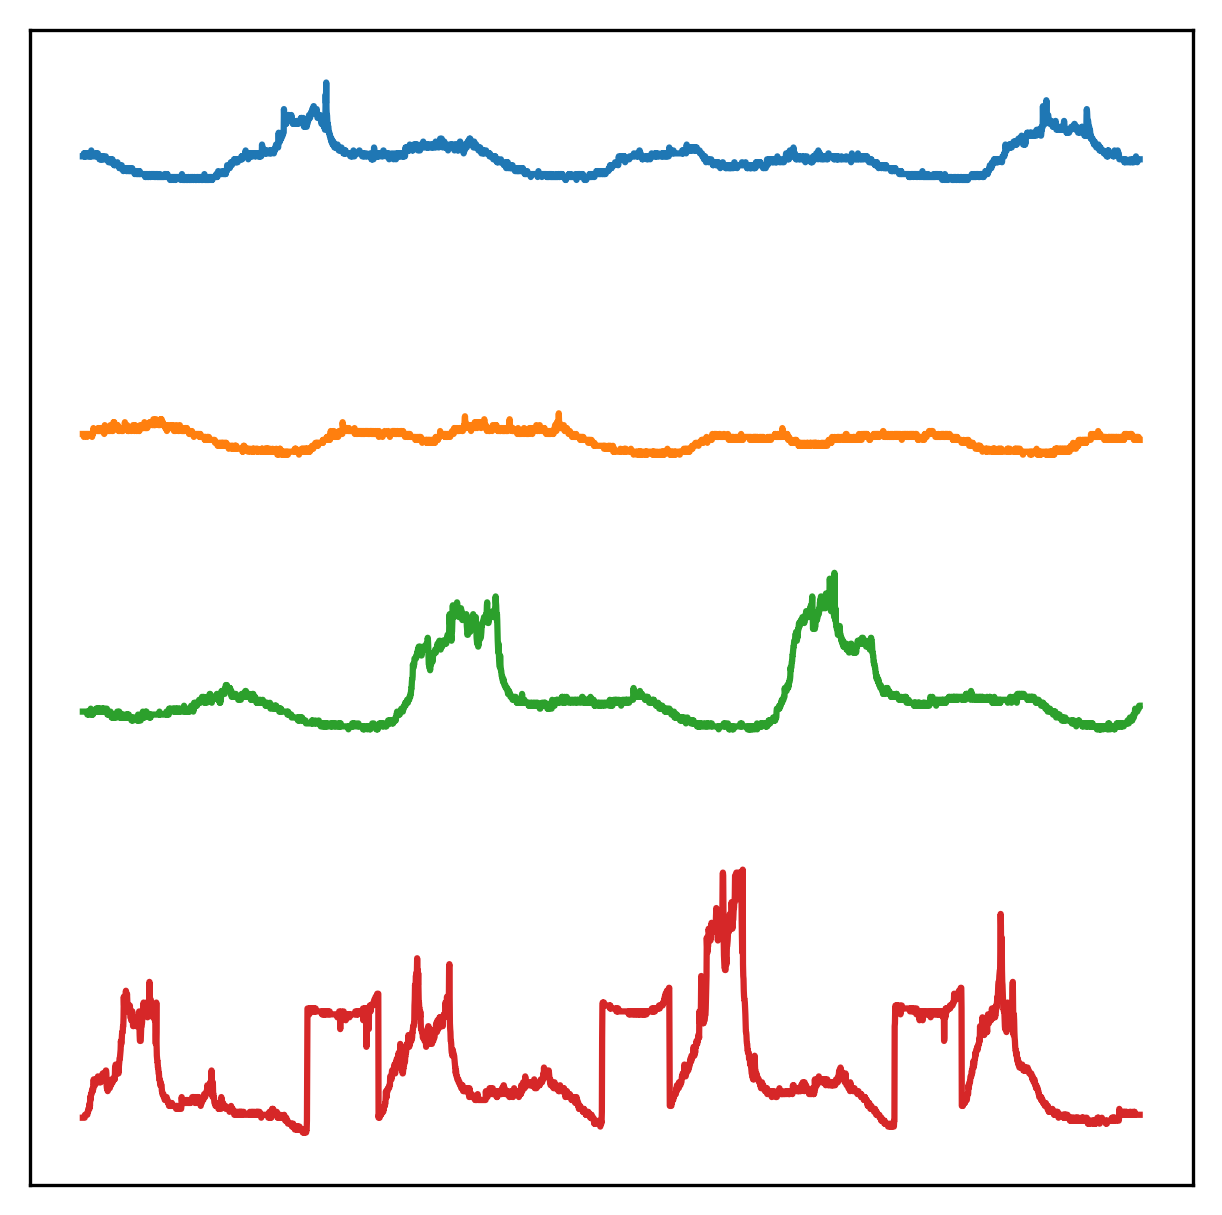

In [279]:
plotSMD()

In [280]:
def plotSMD2():
    path1 = "../Data/SMD/test/machine-1-1.txt"

    
    data = pd.read_csv(path1,header=None).values[:,0][3000:19000]
    
    # data1 = data[3000:7000]
    # data2 = data[7000:11000]

    # data3 = data[11000:15000]
    # data4 = data[15000:19000]


    plt.figure(dpi=300, figsize=(20, 4))
    plt.plot(data,color="black" )
    
    plt.axvspan(0, 4000, color='#2878B5', alpha=0.7)
    plt.axvspan(4000, 8000, color='#FFBE7A', alpha=0.7)
    plt.axvspan(8000, 12000, color='#96C37D', alpha=0.7)
    plt.axvspan(12000, 16000, color='#D8383A', alpha=0.5)
    
        # 隐藏 X 轴和 Y 轴的标签
    plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False,
                    labelleft=False)

    # plt.grid(True, which='major', axis='both', linestyle='-', linewidth=0.5)
    plt.savefig("base2.png")
    plt.show()

    

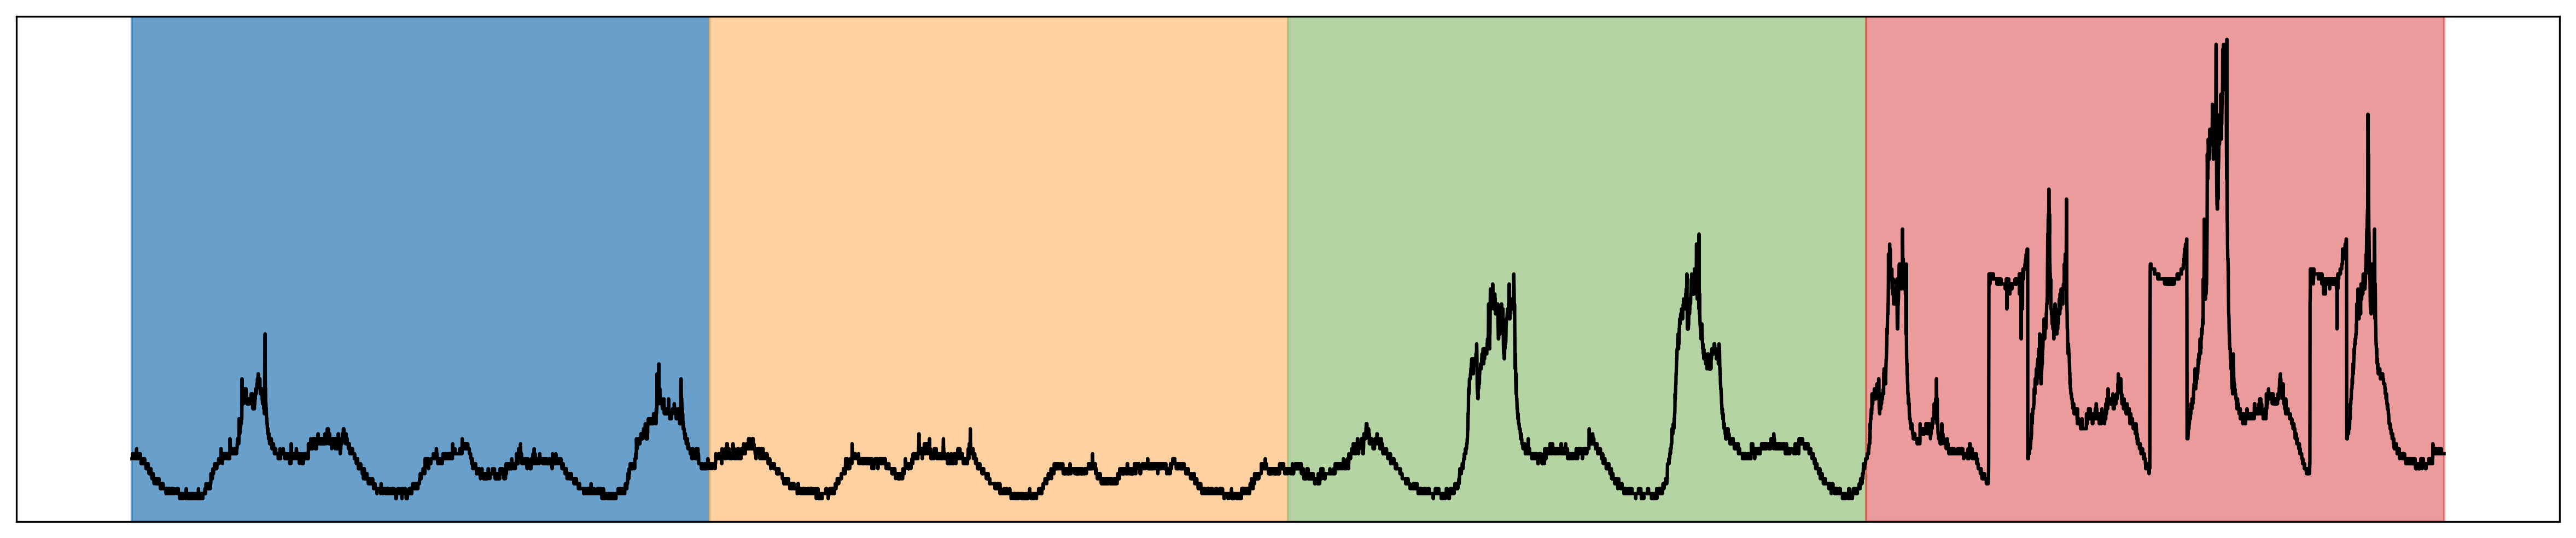

In [281]:
plotSMD2()

In [282]:
def sampleFromWindowData(data: np.ndarray,sample_num:int,indices:np.ndarray = np.array([])):
    length = len(data)

    results = []
    if len(indices) == 0 :
        # 计算均匀间隔
        interval = length // sample_num
        if interval < sample_num :
            indices = np.random.choice(length, sample_num, replace=False)
        else:
            indexes = []
            for i in range(sample_num):
                idx = random.randint(i*interval,(i+1)*interval-1)
                print(idx)
                indexes.append(idx)
            indices = indexes

    for sample_index in indices:
        results.append(data[sample_index])
    
    return results,indices

In [283]:
random_array = np.random.rand(10, 3, 2)
print(random_array)

[[[0.81578229 0.33605175]
  [0.02420211 0.04152704]
  [0.22589095 0.69483201]]

 [[0.02718911 0.10755397]
  [0.61695459 0.22591412]
  [0.8768936  0.90971839]]

 [[0.00145548 0.04941969]
  [0.37719984 0.78040595]
  [0.55836985 0.38605955]]

 [[0.98715391 0.58339927]
  [0.61765613 0.25587351]
  [0.45843083 0.22769444]]

 [[0.82486813 0.02142045]
  [0.06634279 0.12794452]
  [0.24564757 0.36337518]]

 [[0.69313225 0.25601071]
  [0.08490857 0.27161476]
  [0.45058406 0.76722543]]

 [[0.61960823 0.96953254]
  [0.90429266 0.3460526 ]
  [0.83212767 0.38664098]]

 [[0.25988328 0.13676109]
  [0.22454529 0.07382974]
  [0.97344187 0.96210372]]

 [[0.44312944 0.78447138]
  [0.32803438 0.65814281]
  [0.56952185 0.40893021]]

 [[0.12010868 0.49042308]
  [0.43847847 0.99975957]
  [0.8789141  0.84932794]]]


In [284]:
res,ind = sampleFromWindowData(random_array,3)
print(ind)
print(len(res),res[0].shape)
print(res)

2
5
7
[2, 5, 7]
3 (3, 2)
[array([[0.00145548, 0.04941969],
       [0.37719984, 0.78040595],
       [0.55836985, 0.38605955]]), array([[0.69313225, 0.25601071],
       [0.08490857, 0.27161476],
       [0.45058406, 0.76722543]]), array([[0.25988328, 0.13676109],
       [0.22454529, 0.07382974],
       [0.97344187, 0.96210372]])]


In [321]:
def bordaAggregation(rank_list,method_list):
    rank_map = {}

    for method in method_list:
        if rank_map.get(method) == None:
            rank_map[method] = []
     
        for rank_file in rank_list:
            # print(rank_file)
            rank_map[method].append(rank_file[method])

    # print("rank map:",rank_map)
    num_competitors = len(rank_map.keys())

    scores = {method: 0 for method in method_list}

    for competitor, ranks in rank_map.items():
        for rank in ranks:
            scores[competitor] += (num_competitors - rank)

    sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return sorted_scores


In [334]:
dataset_list = [("SMAP",False)]
method_list=["LSTMVAE","LSTMAE","LSTMV2","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]
res = getEvaluationResult(mode="new",dataset_list=dataset_list,method_list=method_list)
sorted_method = []
for dataset,file_maps in res.items():

    file_list = []
    for filename,rank in file_maps.items():

        sorted_res = sorted(rank.items(), key=lambda x: x[1], reverse=True)
        mapt = {}
        index = 1

        for item in sorted_res:
        
            mapt[item[0]] = index
            index += 1

        file_list.append(mapt)

    recom = bordaAggregation(file_list,method_list)
    print("dataset:",dataset," recommond: ",recom)

dataset: SMAP  recommond:  [('TCNAE', 146), ('DAGMM', 135), ('LSTMVAE', 128), ('IForestAD', 120), ('LSTMAE', 113), ('OmniAnomaly', 113), ('LSTMV2', 109), ('TRANSFORMER', 102), ('TRANAD', 98), ('UAE', 74), ('PCAAD', 17)]


In [43]:
import os
import glob

def delete_test_json_files(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir):
        if 'DAGMM' in filenames:
            file_path = os.path.join(dirpath, 'DAGMM.npy')
            print(file_path)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")
# 指定根目录路径
root_directory = '../RecomData/scores/old/DMDS/DMDS'

# 调用函数删除test.json文件
delete_test_json_files(root_directory)


In [7]:
data = np.load("../RecomData/new/SMAP/test/E-3.npy")
data.shape

(8307, 25)

In [9]:
import os
import shutil

def delete_spec_folders(root_dir):
    for dirpath, dirnames, filenames in os.walk(root_dir, topdown=False):
        for dirname in dirnames:
            if 'spec' in dirname:
                folder_path = os.path.join(dirpath, dirname)
                try:
                    shutil.rmtree(folder_path)
                    print(f"Deleted folder: {folder_path}")
                except Exception as e:
                    print(f"Error deleting folder {folder_path}: {e}")

# 指定根目录路径
root_directory = '../Logs/recommondation/new/SMAP/'

# 调用函数删除包含spec字符串的文件夹
delete_spec_folders(root_directory)


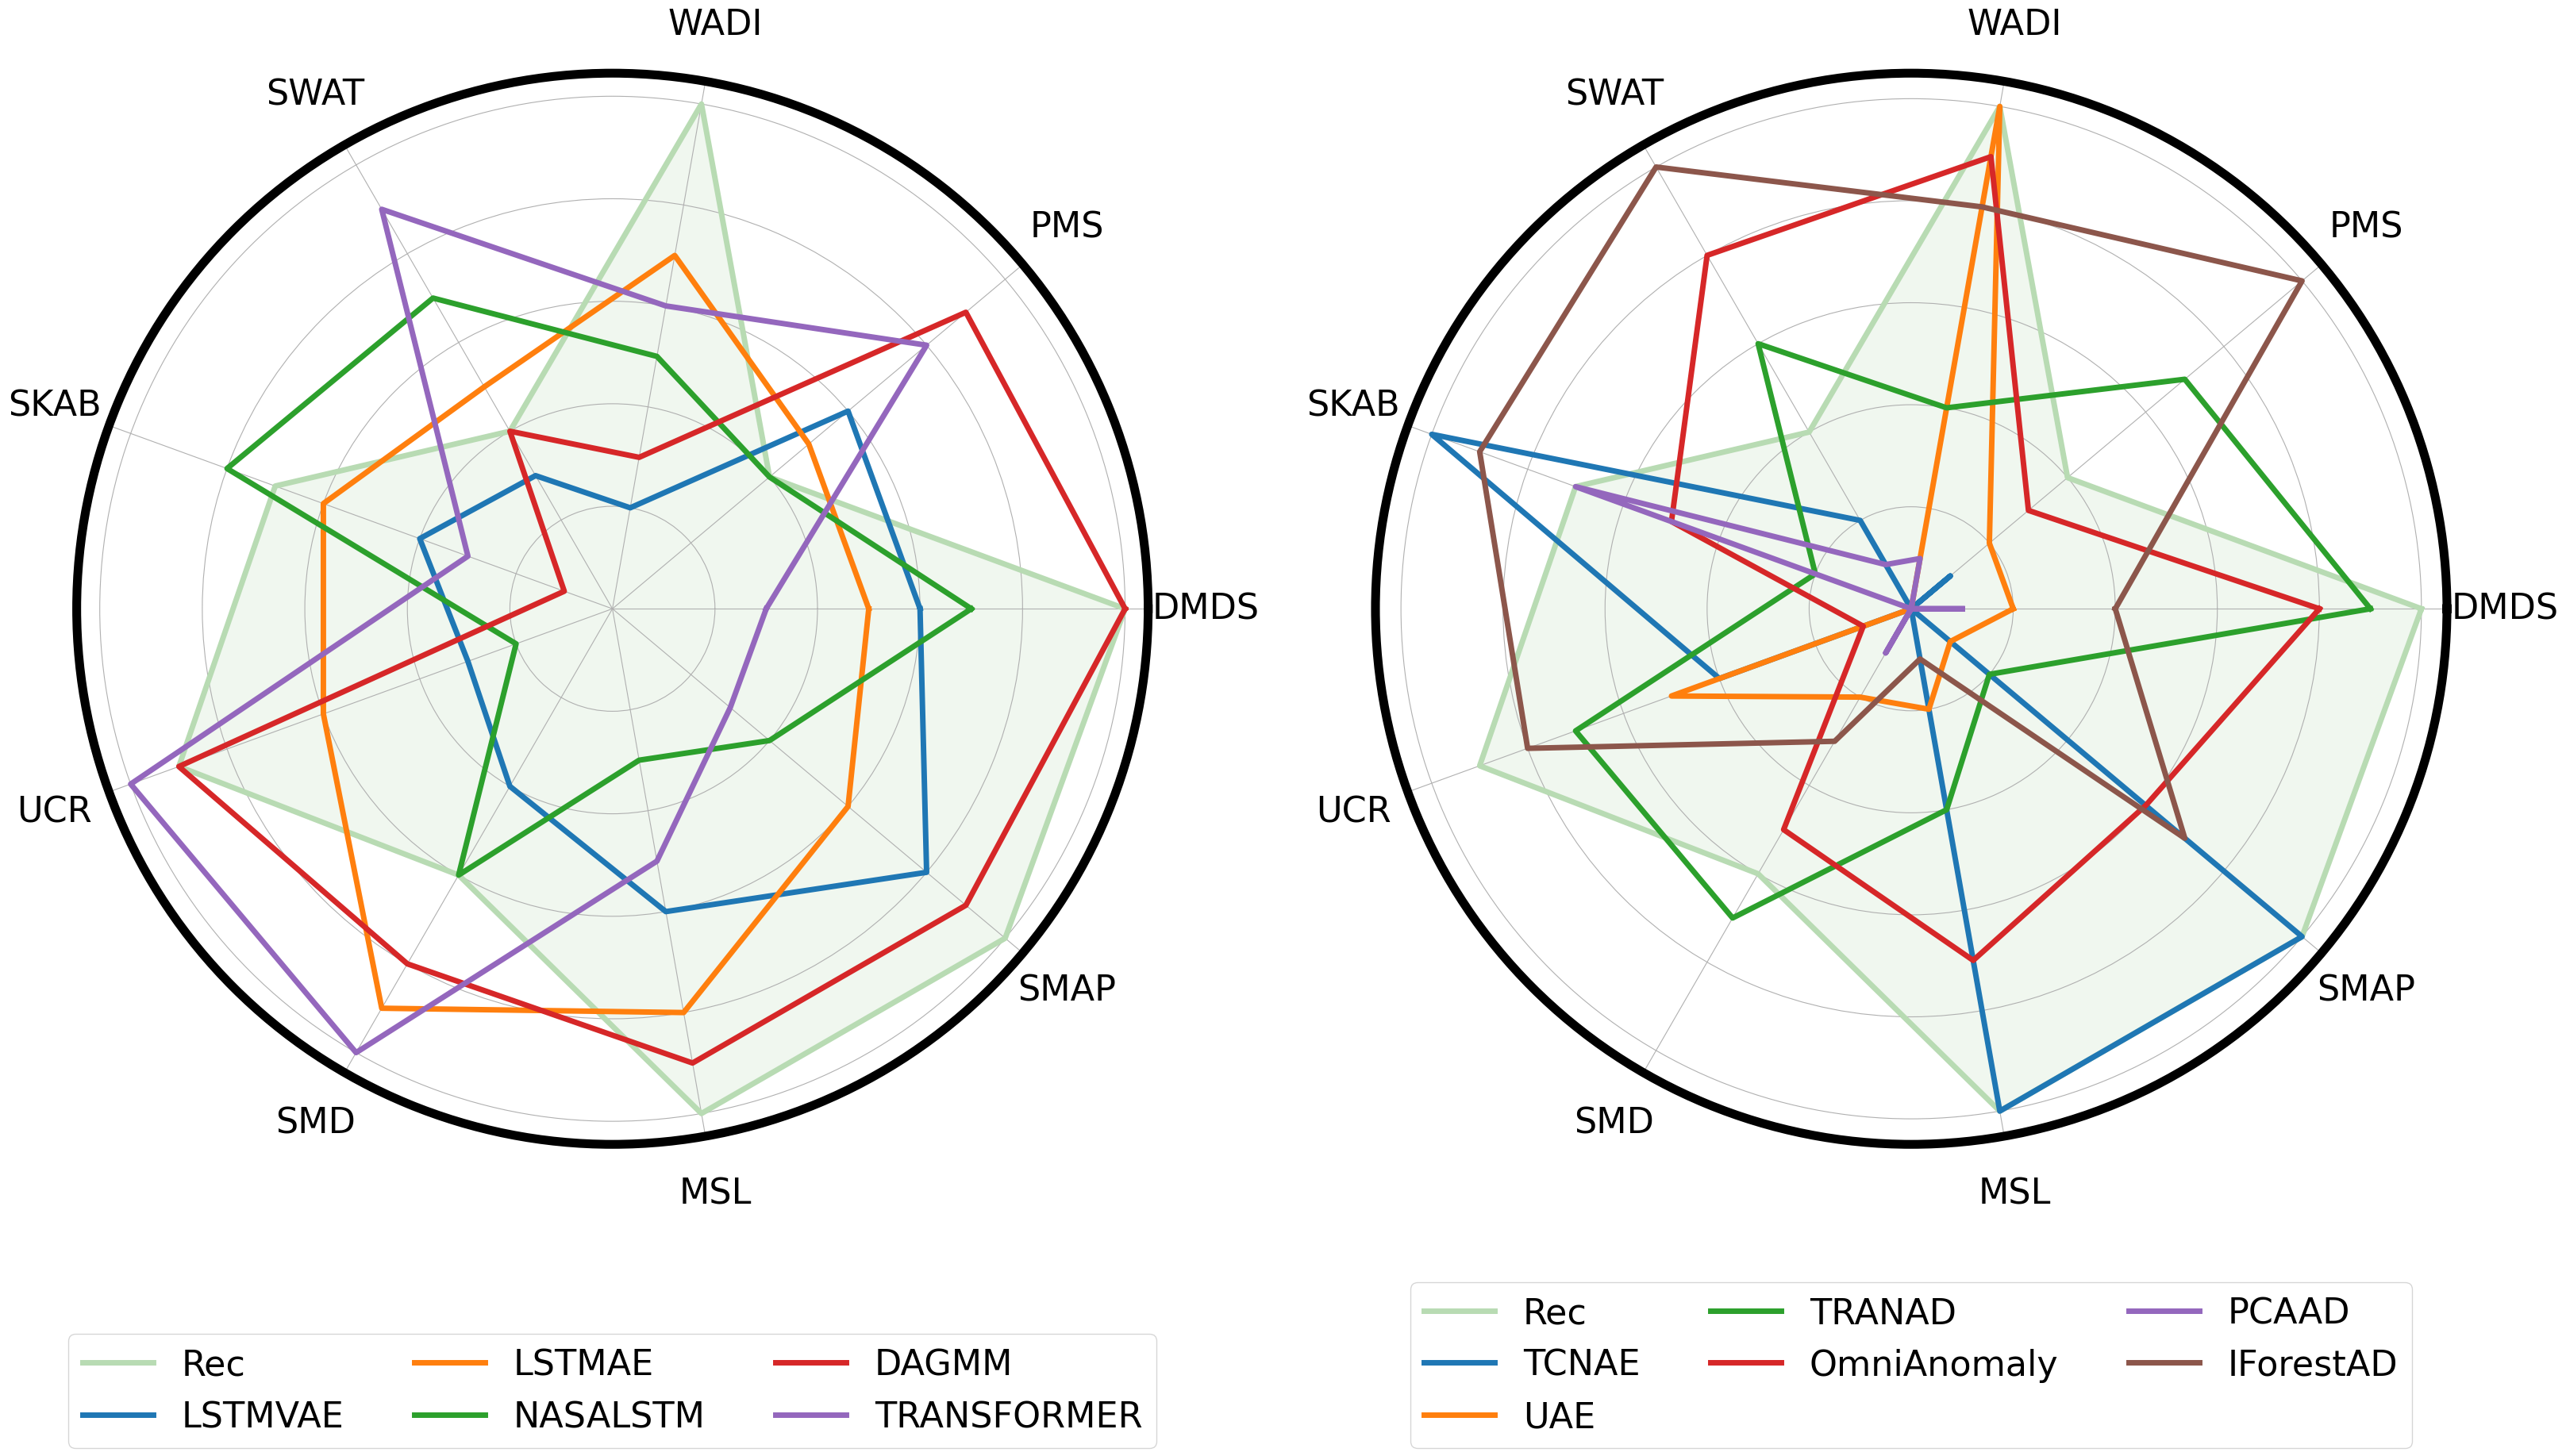

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# 定义九个维度和十一个要比较的量的数据
labels = ['DMDS', 'PMS', 'WADI', 'SWAT', 'SKAB', 'UCR', 'SMD', 'MSL', 'SMAP']
values1 = np.array(
    [
        [
            5,	5,	9,	8	,7	,8	,7,	5	,3
        ],
        [
           6	,6,	4	,6,	5,	5,	2	,3,	5
        ],
        [
            4	,7,	6,	4	,3,	9,	5,	8,	7
        ],
        [
           1,	2,	8	,7	,10,	2	,3	,2,	2
        ],
        [
            8,	3,	5	,2	,8,	1,	1,	6,	8
        ],
        
        [
            1,	7,	1,	7	,4,	2	,5	,1,	1
        ]
        
        
    ]
)

values2 = np.array(
    [
        [
           11,	10,	11,	9,	1,	7,	11,	1,	1
        ],
        [
            9,	9,	1,	11,	11,	6	,9,	9	,10
        ],
        [
          2,	4,	7,	5	,9	,4	,4,	7,	9
        ],
        [
            3,	8,	2,	3,	6,	10	,6,4	,5
        ],
        [
           10,	11,	10,	10,	4	,11,	10,11,	11
        ],
        [
            7,	1,	3	,1,	2,	3	,8,	10,	4
        ],
        
        [
            1,	7,	1,	7	,4,	2	,5	,1,	1
        ]
        
        
    ]
)

    
#"TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"
methods1 = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER"]
methods2 = ["TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]

# 计算角度
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# 将第一个维度的数据复制到末尾，以闭合雷达图
values1 = np.concatenate((values1, values1[:,[0]]), axis=1)
values2 = np.concatenate((values2, values2[:,[0]]), axis=1)
angles += angles[:1]


fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'polar': True}, figsize=(20, 9))

ax1.fill(angles,11 -  values1[-1], color='#B8DBB3', alpha=0.2)
ax1.plot(angles, 11 - values1[-1], color='#B8DBB3', linestyle='solid', label=f'Rec',  linewidth=5)

# 绘制雷达图
for i in range(len(values1)-1):
    ax1.plot(angles, 11 - values1[i], linestyle='solid', label=methods1[i] ,linewidth=5)

ax2.fill(angles,11 -  values2[-1], color='#B8DBB3', alpha=0.2)
ax2.plot(angles, 11 - values2[-1], color='#B8DBB3', linestyle='solid', label=f'Rec',  linewidth=5)

# 绘制雷达图
for i in range(len(values2)-1):
 
    ax2.plot(angles, 11 - values2[i], linestyle='solid', label=methods2[i] ,linewidth=5)


plt.rcParams['figure.autolayout'] = False
# 调整雷达图布局参数
fig.subplots_adjust(top=2.5, bottom=1, left=1, right=2.5)


# 添加标签
ax1.set_xticks(angles[:-1])
ax1.set_xticklabels(labels)
ax1.set_yticklabels([])

ax2.set_yticklabels([])
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(labels)

# plt.title('Result')
# 设置xticks的距离
ax1.tick_params(pad=42)
ax2.tick_params(pad=42)

# ax1.yaxis.grid(True, linestyle='-', linewidth=10)
# ax2.yaxis.grid(True, linestyle='-', linewidth=2)
ax1.spines['polar'].set_linewidth(8)
ax2.spines['polar'].set_linewidth(8)
# 添加图例
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.savefig("模型推荐排名雷达图.pdf", bbox_inches='tight')
plt.show()


In [44]:
def borda_aggregate(rankings):
    num_methods,num_datasets = rankings.shape

    scores = np.zeros(num_methods)
    
    for i in range(num_methods):
        for j in range(num_datasets):
            scores[i] += (num_methods - rankings[i, j])
    print("score:",scores)
    return np.argsort(scores) + 1

In [104]:
rank = np.array(
    [
        [
            5,	5,	9,	8	,7	,8	,7,	5	,3
        ],
        [
           6	,6,	4	,6,	5,	5,	2	,3,	5
        ],
        [
            4	,7,	6,	4	,3,	9,	5,	8,	7
        ],
        [
           1,	2,	8	,7	,10,	2	,3	,2,	2
        ],
        [
            8,	3,	5	,2	,8,	1,	1,	6,	8
        ],
        
        [
           11,	10,	11,	9,	1,	7,	11,	1,	1
        ],
        [
            9,	9,	1,	11,	11,	6	,9,	9	,10
        ],
        [
          2,	4,	7,	5	,9	,4	,4,	7,	9
        ],
        [
            3,	8,	2,	3,	6,	10	,6,4	,5
        ],
        [
           10,	11,	10,	10,	4	,11,	10,11,	11
        ],
        [
            7,	1,	3	,1,	2,	3	,8,	10,	4
        ],
        
        [
            1,	7,	1,	7	,4,	2	,5	,1,	1
        ]
        
        
        
    ]
)
print(borda_aggregate(rank))

score: [51. 66. 55. 71. 66. 46. 33. 57. 61. 20. 69. 79.]
[10  7  6  1  3  8  9  2  5 11  4 12]


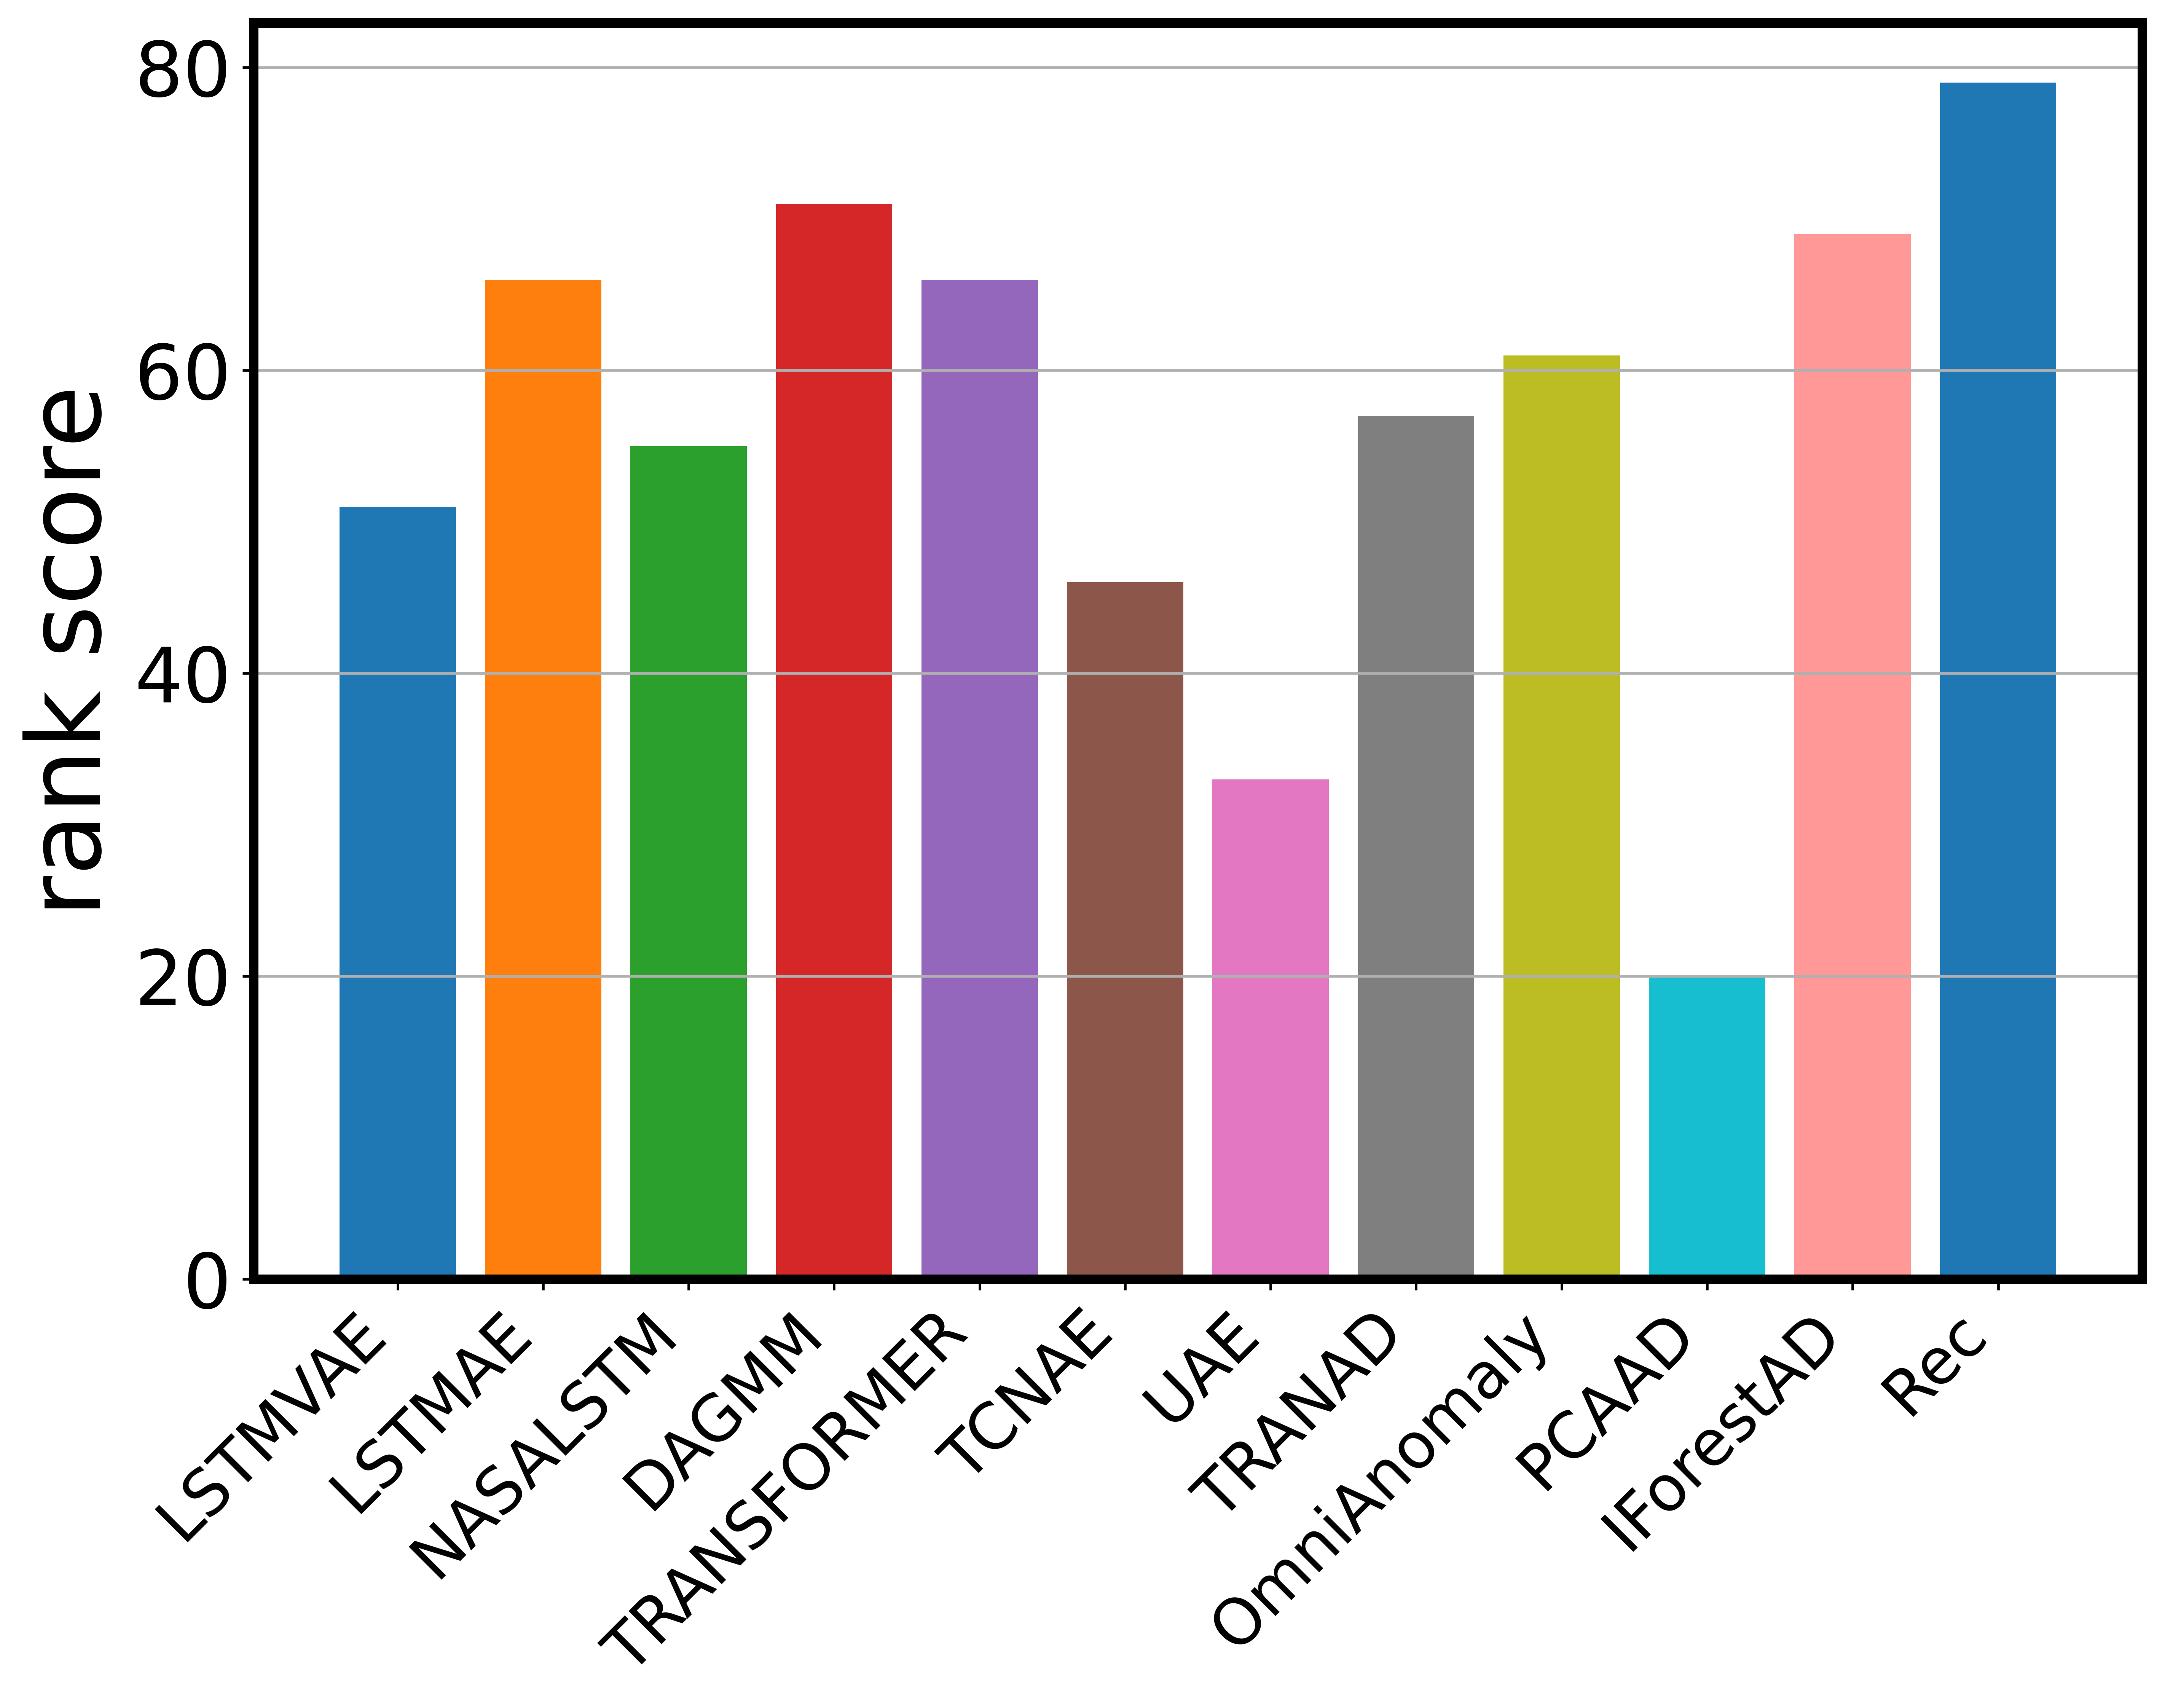

In [259]:
plt.figure(dpi=600, figsize=(10, 8))
scores = [51,66, 55, 71, 66, 46, 33, 57, 61, 20, 69, 79]
methods = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD","Rec"]

# 设置每个方法对应的颜色
colors = ['skyblue','lightsteelblue' , 'gold', 'lightgreen', 'lightcoral',
          'lightblue', 'lightsalmon', 'khaki', 'lightseagreen', 'lavender','salmon', "#B8DBB3"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896']
patterns = ['/', '\\', '|', '-', '+', 'x', '/|\\', '.', '-x', '/-', '\\-', 'x|']



# 绘制柱状图，并为每个柱子设置不同颜色
bars = plt.bar(methods, scores, color=colors)

# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)


# plt.xlabel('method')
plt.ylabel('rank score',fontsize=32)
plt.yticks([0,20,40,60,80],fontsize=24)
plt.xticks(rotation=45, ha='right',fontsize=20) 
plt.tight_layout()  
plt.grid(axis='y')
plt.gca().spines['bottom'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['left'].set_linewidth(3)  # 单独设置y轴线粗细
plt.gca().spines['top'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['right'].set_linewidth(3)  # 单独设置y轴线粗细
plt.savefig("所有数据集方法综合排名.pdf")
plt.show()

In [131]:
def getDatasetRankMap():
    
    dmds = {'DAGMM': 1149037418.7295446, 'NASALSTM': 1046058873.543738, 'OmniAnomaly': 1005485839.0484487, 'LSTMAE': 933796657.7817132, 'LSTMVAE': 908318457.0809048, 'TRANAD': 877634003.8169384, 'IForestAD': 782440674.2370566, 'TRANSFORMER': 713906526.5974035, 'PCAAD': 595061072.8286337, 'UAE': 328213839.08789235, 'TCNAE': 4477999.608895066}   
    wadi = {'UAE': 41015389039.02821, 'DAGMM': 21840106177.653572, 'TRANSFORMER': 15871755998.045507, 'TRANAD': 15288592800.868956, 'NASALSTM': 15191249569.812317, 'LSTMVAE': 12964544072.57065, 'IForestAD': 12179987911.28389, 'OmniAnomaly': 9283962854.955591, 'LSTMAE': 8938022381.027618, 'PCAAD': 2537935653.0983906, 'TCNAE': 14262.227721390205}
    pms = {'NASALSTM': 63816391713.88286, 'IForestAD': 60232884280.02308, 'DAGMM': 58377321208.65352, 'LSTMVAE': 55336995040.56708, 'OmniAnomaly': 54923052982.80982, 'LSTMAE': 53949181763.08934, 'TRANSFORMER': 53940136772.07073, 'TRANAD': 48129533885.364815, 'TCNAE': 21358699900.771324, 'UAE': 2971888898.2897863, 'PCAAD': 1116380405.877931}
    swat = {'DAGMM': 1.9750924629891258, 'NASALSTM': 1.1976043725374967, 'TRANSFORMER': 1.0479216643801188, 'TRANAD': 1.022548210470912, 'LSTMAE': 0.9968817660200813, 'IForestAD': 0.970866162046173, 'OmniAnomaly': 0.8555927239846369, 'LSTMVAE': 0.7703131411443709, 'PCAAD': 0.04670185222450069, 'TCNAE': 0.000899917476805766, 'UAE': 1.8214983947405884e-06}
    
    skab = {'PCAAD': 11.188815239606722, 'TCNAE': 10.505490588984351, 'IForestAD': 9.725946105590994, 'NASALSTM': 9.719105795878935, 'TRANAD': 9.498067753248533, 'LSTMVAE': 9.084168125570233, 'DAGMM': 8.795378624277784, 'OmniAnomaly': 8.724310989764662, 'LSTMAE': 8.182134646435745, 'TRANSFORMER': 6.630218809850944, 'UAE': 0.2981973473053514}
    

    dataset_list = ["DMDS","PMS","WADI","SWAT","SKAB"]
    methods = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]

    data_map = {}
    data_map["DMDS"] = dmds
    data_map["PMS"] = pms
    data_map["WADI"] = wadi
    data_map["SWAT"] = swat
    data_map["SKAB"] = skab

    
    result = {}
    result["DMDS"] = []
    result["PMS"] = []
    result["WADI"] = []
    result["SWAT"] = []
    result["SKAB"] = []

    for dataset in dataset_list:
        index = 1
        for key,item in data_map[dataset].items():
            data_map[dataset][key] = index
            index += 1
    print(data_map)
    for dataset in dataset_list:
        for method in methods:
            result[dataset].append(data_map[dataset][method])

    print(result)
    return result


    
one_dataset_rank = getDatasetRankMap()
    




{'DMDS': {'DAGMM': 1, 'NASALSTM': 2, 'OmniAnomaly': 3, 'LSTMAE': 4, 'LSTMVAE': 5, 'TRANAD': 6, 'IForestAD': 7, 'TRANSFORMER': 8, 'PCAAD': 9, 'UAE': 10, 'TCNAE': 11}, 'PMS': {'NASALSTM': 1, 'IForestAD': 2, 'DAGMM': 3, 'LSTMVAE': 4, 'OmniAnomaly': 5, 'LSTMAE': 6, 'TRANSFORMER': 7, 'TRANAD': 8, 'TCNAE': 9, 'UAE': 10, 'PCAAD': 11}, 'WADI': {'UAE': 1, 'DAGMM': 2, 'TRANSFORMER': 3, 'TRANAD': 4, 'NASALSTM': 5, 'LSTMVAE': 6, 'IForestAD': 7, 'OmniAnomaly': 8, 'LSTMAE': 9, 'PCAAD': 10, 'TCNAE': 11}, 'SWAT': {'DAGMM': 1, 'NASALSTM': 2, 'TRANSFORMER': 3, 'TRANAD': 4, 'LSTMAE': 5, 'IForestAD': 6, 'OmniAnomaly': 7, 'LSTMVAE': 8, 'PCAAD': 9, 'TCNAE': 10, 'UAE': 11}, 'SKAB': {'PCAAD': 1, 'TCNAE': 2, 'IForestAD': 3, 'NASALSTM': 4, 'TRANAD': 5, 'LSTMVAE': 6, 'DAGMM': 7, 'OmniAnomaly': 8, 'LSTMAE': 9, 'TRANSFORMER': 10, 'UAE': 11}}
{'DMDS': [5, 4, 2, 1, 8, 11, 10, 6, 3, 9, 7], 'PMS': [4, 6, 1, 3, 7, 9, 10, 8, 5, 11, 2], 'WADI': [6, 9, 5, 2, 3, 11, 1, 4, 8, 10, 7], 'SWAT': [8, 5, 2, 1, 3, 10, 11, 4, 7, 9,

In [135]:
def getDatasetRankMapMulti():
    smd = [('NASALSTM', 85), ('UAE', 84), ('LSTMAE', 68), ('TRANSFORMER', 67), ('DAGMM', 52), ('TRANAD', 49), ('OmniAnomaly', 34), ('LSTMVAE', 26), ('IForestAD', 21), ('TCNAE', 9), ('PCAAD', 0)]
    msl = [('TCNAE', 49), ('DAGMM', 46), ('LSTMVAE', 40), ('NASALSTM', 34), ('TRANAD', 26), ('OmniAnomaly', 25), ('LSTMAE', 21), ('TRANSFORMER', 14), ('IForestAD', 11), ('PCAAD', 9), ('UAE', 0)]
    smap = [('TCNAE', 168), ('IForestAD', 153), ('DAGMM', 134), ('NASALSTM', 118), ('OmniAnomaly', 90), ('LSTMVAE', 84), ('TRANSFORMER', 62), ('TRANAD', 55), ('LSTMAE', 54), ('PCAAD', 12), ('UAE', 5)]
    ucr = [('DAGMM', 171), ('TRANSFORMER', 155), ('TCNAE', 149), ('NASALSTM', 145), ('LSTMVAE', 105), ('PCAAD', 96), ('IForestAD', 89), ('LSTMAE', 82), ('TRANAD', 66), ('OmniAnomaly', 22), ('UAE', 20)]




    dataset_list = ["SMD","UCR","MSL","SMAP"]
    methods = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]

    data_map = {}
    data_map["SMD"] = smd
    data_map["UCR"] = ucr
    data_map["MSL"] = msl
    data_map["SMAP"] = smap

    data_method_map = {}
    data_method_map["SMD"] = {}
    data_method_map["UCR"] = {}
    data_method_map["MSL"] = {}
    data_method_map["SMAP"] = {}
    
    result = {}
    result["SMD"] = []
    result["UCR"] = []
    result["MSL"] = []
    result["SMAP"] = []


    for dataset in dataset_list:
    
        for item in data_map[dataset]:
            data_method_map[dataset][item[0]] = item[1]

    for dataset in dataset_list:
        index = 1
        for key,item in data_method_map[dataset].items():
            data_method_map[dataset][key] = index
            index += 1
            
    print(data_method_map)
    for dataset in dataset_list:
        print("dataset:",dataset)
        for method in methods:
            print("method:",method)
            result[dataset].append(data_method_map[dataset][method])

    print(result)
    return result
multi_dataset_rank = getDatasetRankMapMulti()

recomment_dataset_rank = {**one_dataset_rank,**multi_dataset_rank}
print(recomment_dataset_rank)

{'SMD': {'NASALSTM': 1, 'UAE': 2, 'LSTMAE': 3, 'TRANSFORMER': 4, 'DAGMM': 5, 'TRANAD': 6, 'OmniAnomaly': 7, 'LSTMVAE': 8, 'IForestAD': 9, 'TCNAE': 10, 'PCAAD': 11}, 'UCR': {'DAGMM': 1, 'TRANSFORMER': 2, 'TCNAE': 3, 'NASALSTM': 4, 'LSTMVAE': 5, 'PCAAD': 6, 'IForestAD': 7, 'LSTMAE': 8, 'TRANAD': 9, 'OmniAnomaly': 10, 'UAE': 11}, 'MSL': {'TCNAE': 1, 'DAGMM': 2, 'LSTMVAE': 3, 'NASALSTM': 4, 'TRANAD': 5, 'OmniAnomaly': 6, 'LSTMAE': 7, 'TRANSFORMER': 8, 'IForestAD': 9, 'PCAAD': 10, 'UAE': 11}, 'SMAP': {'TCNAE': 1, 'IForestAD': 2, 'DAGMM': 3, 'NASALSTM': 4, 'OmniAnomaly': 5, 'LSTMVAE': 6, 'TRANSFORMER': 7, 'TRANAD': 8, 'LSTMAE': 9, 'PCAAD': 10, 'UAE': 11}}
dataset: SMD
method: LSTMVAE
method: LSTMAE
method: NASALSTM
method: DAGMM
method: TRANSFORMER
method: TCNAE
method: UAE
method: TRANAD
method: OmniAnomaly
method: PCAAD
method: IForestAD
dataset: UCR
method: LSTMVAE
method: LSTMAE
method: NASALSTM
method: DAGMM
method: TRANSFORMER
method: TCNAE
method: UAE
method: TRANAD
method: OmniAnomal

In [136]:
actual_rank = np.array(
    [
        [
            5,	5,	9,	8	,7	,8	,7,	5	,3
        ],
        [
           6	,6,	4	,6,	5,	5,	2	,3,	5
        ],
        [
            4	,7,	6,	4	,3,	9,	5,	8,	7
        ],
        [
           1,	2,	8	,7	,10,	2	,3	,2,	2
        ],
        [
            8,	3,	5	,2	,8,	1,	1,	6,	8
        ],
        
        [
           11,	10,	11,	9,	1,	7,	11,	1,	1
        ],
        [
            9,	9,	1,	11,	11,	6	,9,	9	,10
        ],
        [
          2,	4,	7,	5	,9	,4	,4,	7,	9
        ],
        [
            3,	8,	2,	3,	6,	10	,6,4	,5
        ],
        [
           10,	11,	10,	10,	4	,11,	10,11,	11
        ],
        [
            7,	1,	3	,1,	2,	3	,8,	10,	4
        ]
        
        
        
    ]
).T
print(actual_rank.T)
actual_rank_map = {}
dataset_list = ['DMDS', 'PMS', 'WADI', 'SWAT', 'SKAB', 'UCR', 'SMD', 'MSL', 'SMAP']

for idx,dataset in enumerate(dataset_list):
    actual_rank_map[dataset] = actual_rank[idx]
    

[[ 5  5  9  8  7  8  7  5  3]
 [ 6  6  4  6  5  5  2  3  5]
 [ 4  7  6  4  3  9  5  8  7]
 [ 1  2  8  7 10  2  3  2  2]
 [ 8  3  5  2  8  1  1  6  8]
 [11 10 11  9  1  7 11  1  1]
 [ 9  9  1 11 11  6  9  9 10]
 [ 2  4  7  5  9  4  4  7  9]
 [ 3  8  2  3  6 10  6  4  5]
 [10 11 10 10  4 11 10 11 11]
 [ 7  1  3  1  2  3  8 10  4]]


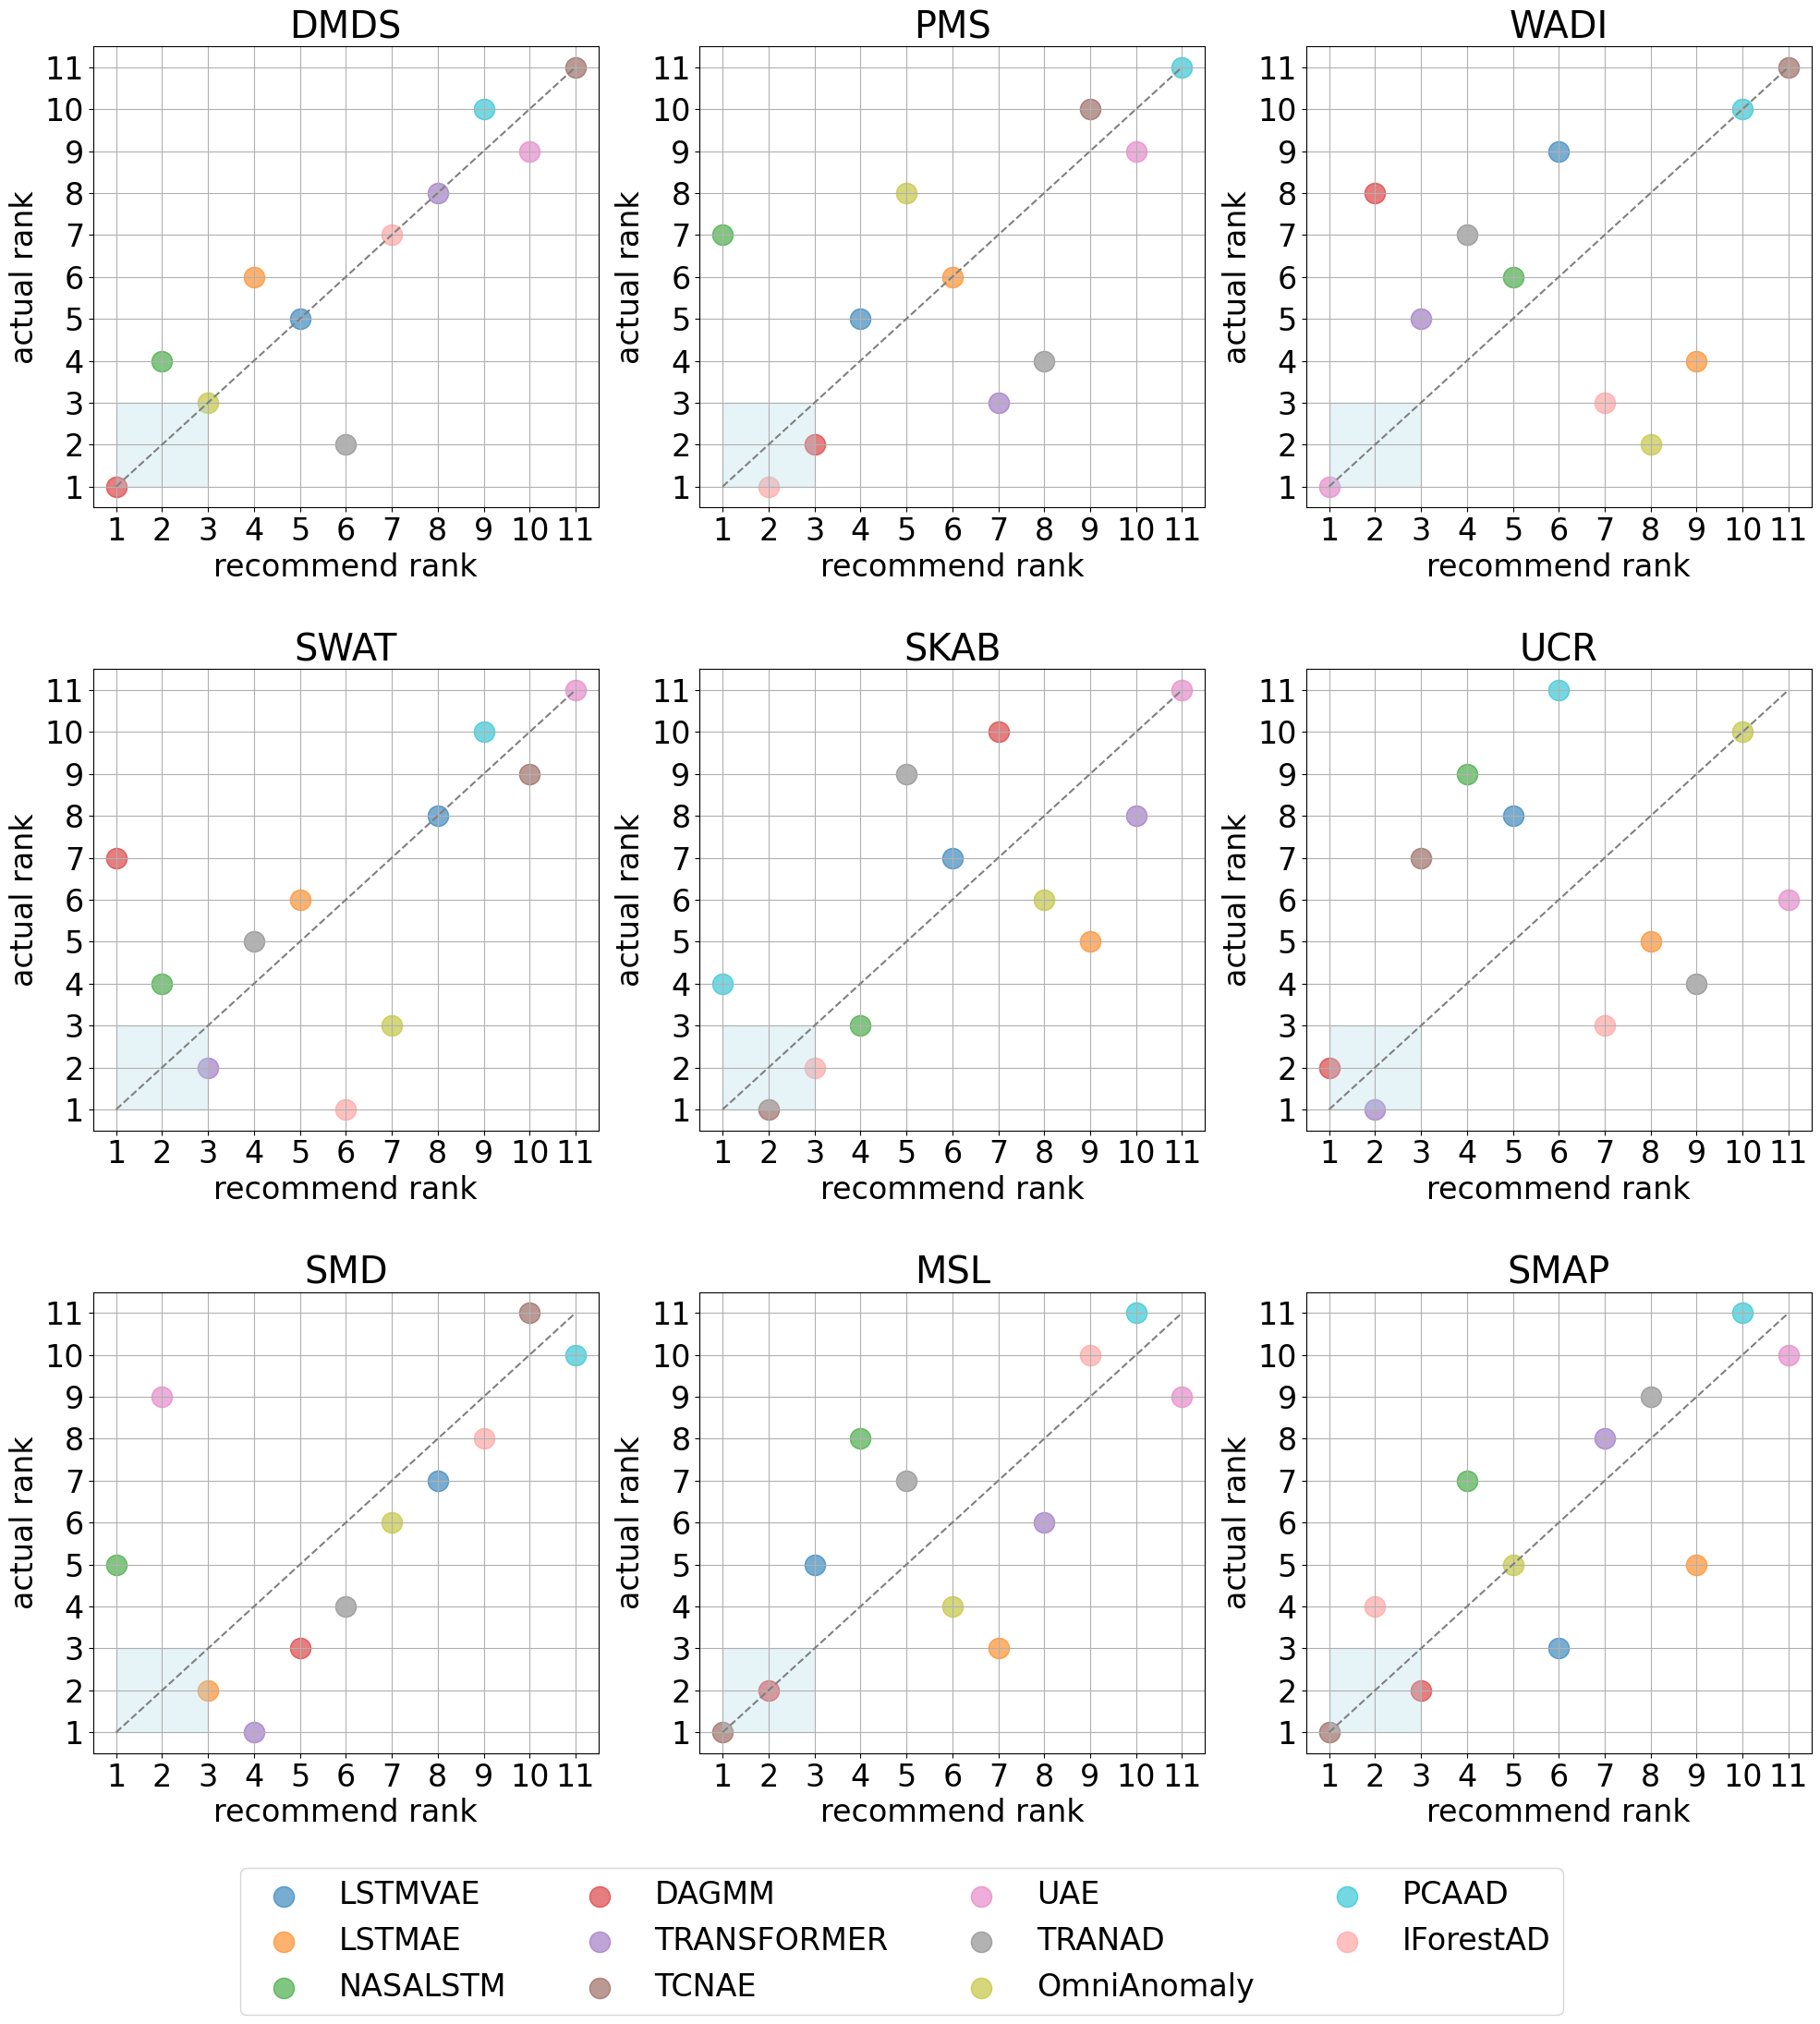

In [139]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})
expected_rank = [5,4,2,1,8,11,10,6,3,9,7]
actual_rank = [5,6,4,1,8,11,9,2,3,10,7]

colors = ['skyblue','lightsteelblue' , 'gold', 'lightgreen', 'lightcoral',
          'lightblue', 'lightsalmon', 'khaki', 'lightseagreen', 'lavender','salmon']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896']
sizes = [256]*11
# 创建包含9个子图的散点图
fig, axs = plt.subplots(3, 3, figsize=(24, 24))
dataset_list = ['DMDS', 'PMS', 'WADI', 'SWAT', 'SKAB', 'UCR', 'SMD', 'MSL', 'SMAP']
methods = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]
for i,dataset in enumerate(dataset_list):
    # 调整散点的大小

    # 在每个子图中绘制散点图
    ax = axs[i//3, i%3]
    actual_rank = actual_rank_map[dataset]
    expected_rank = recomment_dataset_rank[dataset]
    for i in range(len(methods)):
        ax.scatter(expected_rank[i], actual_rank[i], c=colors[i], s=sizes[i], alpha=0.6, label=methods[i])

    # ax.scatter(expected_rank, actual_rank, c=colors, s=sizes,l)
    ax.plot([1, 11], [1, 11], color='gray', linestyle='--')  # 绘制对角线参考线
    ax.fill([1, 3, 3, 1], [1, 1, 3, 3], color='lightblue', alpha=0.3)
    ax.set_xlabel("recommend rank")
    ax.set_ylabel("actual rank")
    # 设置x轴刻度
    xticks = [1,2,3,4,5,6,7,8,9,10,11]  
    yticks = [1,2,3,4,5,6,7,8,9,10,11]  
    # ax.xticks = list(ax.xticks()[0]) + [1, 11]
    ax.set_xticks(xticks)  # 添加额外的两个刻度
    ax.set_yticks(yticks)  # 添加额外的两个刻度


    ax.set_title(dataset)
    ax.grid(True)


# # 绘制散点图
# plt.scatter(expected_rank, actual_rank, s=[64]*11, c=colors)
# plt.plot([1, 11], [1, 11], color='red', linestyle='--')  # 绘制对角线参考线

# plt.grid(True)
# # plt.xticks([])
# # plt.yticks([])
# plt.xlabel("recommend rank")
# plt.ylabel("actual rank")

plt.subplots_adjust(hspace=0.35)  # 设置垂直间距为0.5
plt.legend(loc='lower center', bbox_to_anchor=(-0.8, -0.6), ncol=4)
plt.savefig("推荐方法排名与实际排名.pdf", bbox_inches='tight', dpi=600)
plt.show()


In [229]:
path = "../RecomData/new/SMAP/window/test/"
path_list = os.listdir(path)
print(path_list)
for pt in path_list:
    data = np.load(path+"/" + pt)
    print(pt,data.shape)

['A-1.npy', 'A-3.npy', 'A-5.npy', 'A-6.npy', 'D-4.npy', 'D-5.npy', 'E-1.npy', 'E-10.npy', 'E-13.npy', 'E-2.npy', 'E-3.npy', 'E-4.npy', 'E-5.npy', 'E-6.npy', 'E-7.npy', 'P-3.npy', 'R-1.npy']
A-1.npy (8631, 10, 25)
A-3.npy (8196, 10, 25)
A-5.npy (4684, 10, 25)
A-6.npy (4444, 10, 25)
D-4.npy (8464, 10, 25)
D-5.npy (7619, 10, 25)
E-1.npy (8507, 10, 25)
E-10.npy (8496, 10, 25)
E-13.npy (8631, 10, 25)
E-2.npy (8523, 10, 25)
E-3.npy (8298, 10, 25)
E-4.npy (8345, 10, 25)
E-5.npy (8285, 10, 25)
E-6.npy (8291, 10, 25)
E-7.npy (8301, 10, 25)
P-3.npy (8484, 10, 25)
R-1.npy (7235, 10, 25)


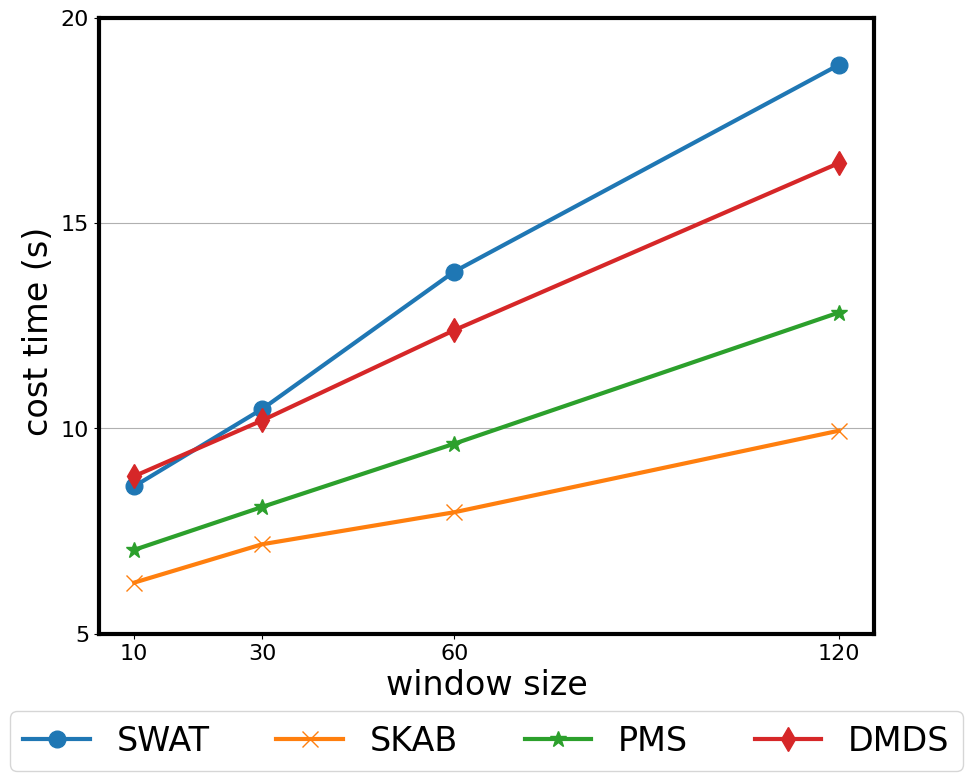

In [178]:
plt.rcParams.update({'font.size': 24})
dataset_list = [("SWAT", True), ("SKAB", True),("PMS", True),  ("DMDS", True)]
plt.figure(figsize=(10, 8))
running_time_window_10 = [8.587627410888672, 6.243000030517578, 7.04082989692688, 8.834623336791992]
running_time_window_30 = [10.472031116485596, 7.178020477294922, 8.086747646331787, 10.193302869796753]
running_time_window_60 = [13.818975448608398, 7.957210063934326, 9.626643180847168, 12.392051219940186]
running_time_window_120 = [18.848588705062866, 9.941516637802124, 12.818604707717896, 16.4578857421875]

matrix = np.array([running_time_window_10,running_time_window_30,running_time_window_60,running_time_window_120]).T
x_axis = [10,30,60,120]
plt.plot(x_axis,matrix[0], marker='o',label="SWAT",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[1], marker='x',label="SKAB",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[2], marker='*',label="PMS",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[3], marker='d',label="DMDS",markersize=12,linewidth=3)

plt.xticks(x_axis,fontsize=16)
plt.yticks([5,10,15,20],fontsize=16)
plt.xlabel("window size")
plt.ylabel("cost time (s) ")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.gca().spines['bottom'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['left'].set_linewidth(3)  # 单独设置y轴线粗细
plt.gca().spines['top'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['right'].set_linewidth(3)  # 单独设置y轴线粗细
plt.grid(axis='y')
plt.savefig("windowsize-cost-time.pdf", bbox_inches='tight', dpi=600)
plt.show()






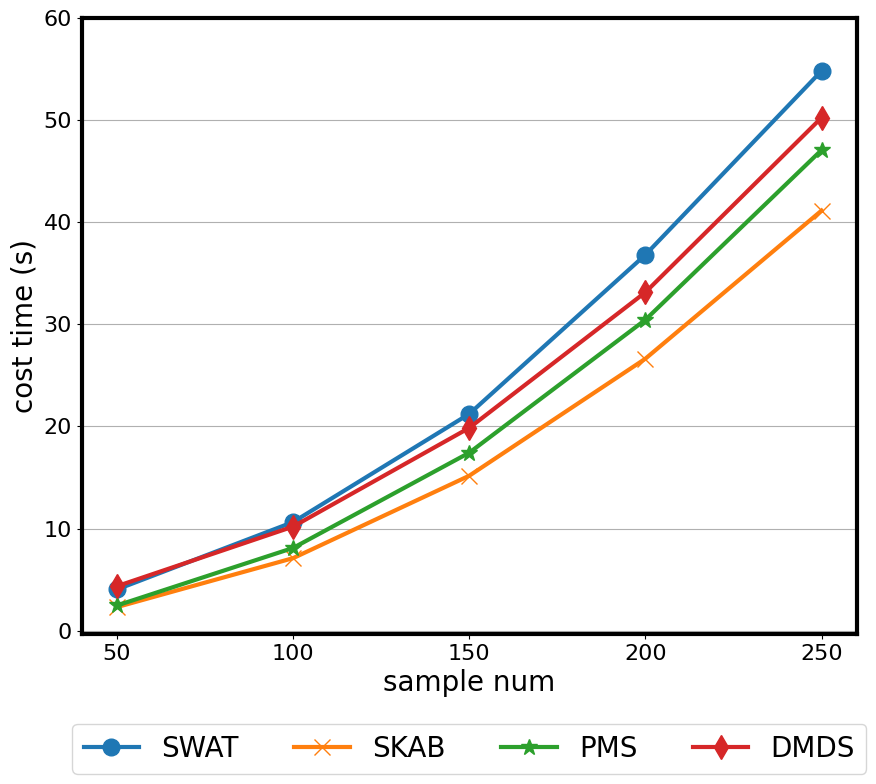

In [187]:
plt.rcParams.update({'font.size': 20})
dataset_list = [("SWAT", True), ("SKAB", True),("PMS", True),  ("DMDS", True)]
plt.figure(figsize=(10, 8))
running_time_sample_50 = [4.033447742462158, 2.30595326423645, 2.4639880657196045, 4.352376937866211]
running_time_sample_100 = [10.633157730102539, 7.09870457649231, 8.098083972930908, 10.187296867370605]
running_time_sample_150 = [21.223012924194336, 15.167837381362915, 17.423831462860107, 19.853538513183594]
running_time_sample_200 = [36.80469083786011, 26.629218339920044, 30.437287092208862, 33.13096761703491]
running_time_sample_250 = [54.8110728263855, 41.13189506530762, 47.060296297073364, 50.229074239730835]

matrix = np.array([running_time_sample_50,running_time_sample_100,running_time_sample_150,running_time_sample_200,running_time_sample_250]).T
x_axis = [50,100,150,200,250]
plt.plot(x_axis,matrix[0], marker='o',label="SWAT",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[1], marker='x',label="SKAB",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[2], marker='*',label="PMS",markersize=12,linewidth=3)
plt.plot(x_axis,matrix[3], marker='d',label="DMDS",markersize=12,linewidth=3)

plt.xticks(x_axis,fontsize=16)
plt.yticks([0,10,20,30,40,50,60],fontsize=16)

plt.xlabel("sample num")
plt.ylabel("cost time (s)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4)
plt.gca().spines['bottom'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['left'].set_linewidth(3)  # 单独设置y轴线粗细
plt.gca().spines['top'].set_linewidth(3)  # 单独设置x轴线粗细
plt.gca().spines['right'].set_linewidth(3)  # 单独设置y轴线粗细
plt.grid(axis='y')
plt.savefig("sample-num-cost-time.pdf", bbox_inches='tight', dpi=600)
plt.show()




In [247]:

pms = [('IForestAD', 0.41203598699629546), ('DAGMM', 0.3917796550010648), ('TRANSFORMER', 0.36127988275883127), ('TRANAD', 0.3565100154083205), ('LSTMVAE', 0.3561535417491096), ('LSTMAE', 0.35247352566690476), ('NASALSTM', 0.351559528337771), ('OmniAnomaly', 0.31978100600367065), ('UAE', 0.005663164806303349), ('TCNAE', 0.0024529844644317253), ('PCAAD', 0.0011495196649971263)]
pms_max = 0.41203598699629546


pms_xaxis = []
pms_yaxis = []

for method,value in pms:
    pms_xaxis.append(method)
    pms_yaxis.append(value/pms_max)
print(pms_xaxis)
print(pms_yaxis)




['IForestAD', 'DAGMM', 'TRANSFORMER', 'TRANAD', 'LSTMVAE', 'LSTMAE', 'NASALSTM', 'OmniAnomaly', 'UAE', 'TCNAE', 'PCAAD']
[1.0, 0.9508384397612999, 0.8768163319726718, 0.865239995193735, 0.8643748434340317, 0.8554435456873668, 0.853225299325449, 0.7760997002588168, 0.013744345117976953, 0.005953325781841914, 0.002789852588792108]


In [248]:
swat = [('IForestAD', 0.7213506065143328), ('TRANSFORMER', 0.7185557408650827), ('OmniAnomaly', 0.7110767872903795), ('NASALSTM', 0.7110390326780079), ('TRANAD', 0.7109850825315562), ('LSTMAE', 0.7108247650147831), ('DAGMM', 0.7071683880446462), ('LSTMVAE', 0.578488845464908), ('TCNAE', 0.013140139365114479), ('PCAAD', 0.001061266001901435), ('UAE', 0.0004913794945200505)]
swat_max = 0.7213506065143328


swat_xaxis = []
swat_yaxis = []

for method,value in swat:
    swat_xaxis.append(method)
    swat_yaxis.append(value/swat_max)
print(swat_xaxis)
print(swat_yaxis)


['IForestAD', 'TRANSFORMER', 'OmniAnomaly', 'NASALSTM', 'TRANAD', 'LSTMAE', 'DAGMM', 'LSTMVAE', 'TCNAE', 'PCAAD', 'UAE']
[1.0, 0.9961255100862044, 0.9857575232748499, 0.9857051844925288, 0.9856303940286898, 0.985408147710013, 0.9803393546195004, 0.8019523935250392, 0.018216023174374905, 0.0014712207799056562, 0.0006811937081393263]


/tmp/ipykernel_1270/3794621211.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(pms_xaxis, rotation=45, ha='right',fontsize=16)
/tmp/ipykernel_1270/3794621211.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(swat_xaxis, rotation=45, ha='right',fontsize=16)


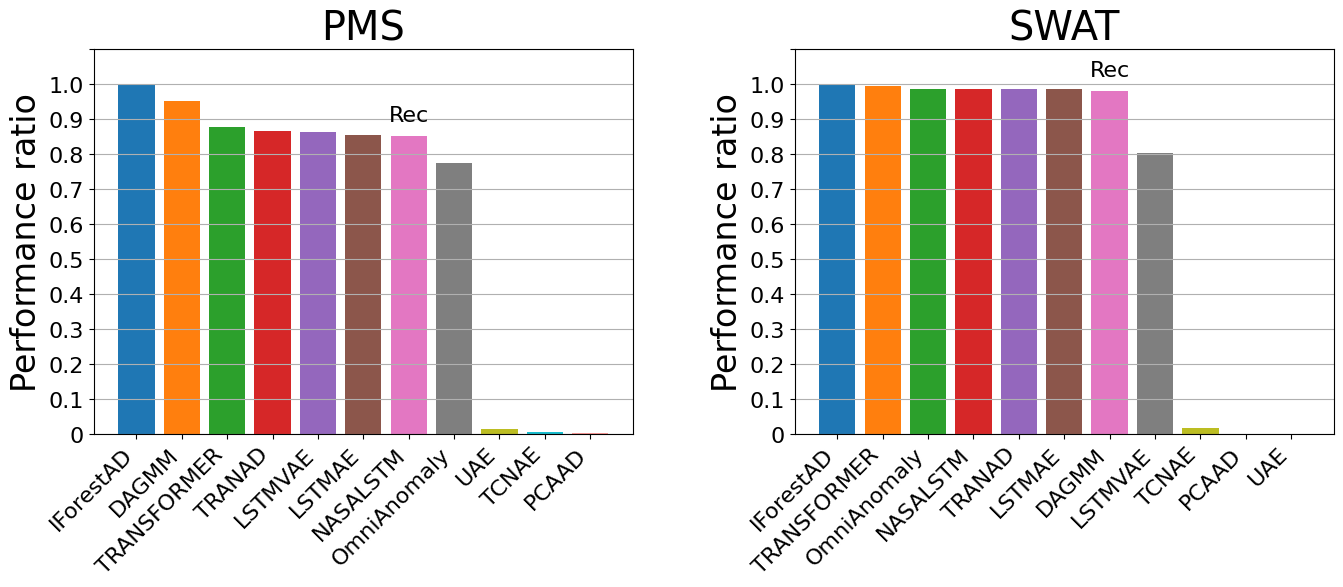

In [258]:


import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#ff9896']


fig, axs = plt.subplots(1, 2, figsize=(16, 5))
dataset_list = [ 'PMS',  'SWAT']

methods = ["LSTMVAE","LSTMAE","NASALSTM","DAGMM","TRANSFORMER","TCNAE","UAE","TRANAD","OmniAnomaly","PCAAD","IForestAD"]
patterns = [""]*11

xticks = [1,2,3,4,5,6,7,8,9,10,11]  
yticks = [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,1.1]  
ylabels = [0,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1.00,""]  


ax1 = axs[0]

# 绘制柱状图，并为每个柱子设置不同颜色
bars1 = ax1.bar(pms_xaxis, pms_yaxis, color=colors)

for bar, pattern in zip(bars1, patterns):
    bar.set_hatch(pattern)

# 在第七个柱子的上方添加文字
ax1.text(6, pms_yaxis[6] + 0.03, "Rec", ha='center', va='bottom',fontsize=16)

ax1.set_xlabel("")
ax1.set_ylabel("Performance ratio")

# ax.xticks = list(ax.xticks()[0]) + [1, 11]

ax1.set_yticks(yticks)  # 添加额外的两个刻度
ax1.set_yticklabels(ylabels,fontsize=16)  # 添加额外的两个刻度

ax1.set_title("PMS")

#--------------
ax2 = axs[1]

# 绘制柱状图，并为每个柱子设置不同颜色
bars2 = ax2.bar(swat_xaxis, swat_yaxis, color=colors)

for bar, pattern in zip(bars2, patterns):
    bar.set_hatch(pattern)

# 在第七个柱子的上方添加文字
ax2.text(6, swat_yaxis[6] + 0.03,"Rec", ha='center', va='bottom',fontsize=16)
ax2.set_xlabel("")
ax2.set_ylabel("Performance ratio")
# 设置x轴刻度

# ax.xticks = list(ax.xticks()[0]) + [1, 11]

ax2.set_yticks(yticks)  # 添加额外的两个刻度
ax2.set_yticklabels(ylabels,fontsize=16)  # 添加额外的两个刻度

ax2.set_title("SWAT")



ax1.grid(axis='y')
ax1.set_xticklabels(pms_xaxis, rotation=45, ha='right',fontsize=16)
    

ax2.grid(axis='y')
ax2.set_xticklabels(swat_xaxis, rotation=45, ha='right',fontsize=16)



# 设置子图之间的水平间距
plt.subplots_adjust(wspace=0.3)

# plt.legend(loc='lower center', bbox_to_anchor=(-0.8, -0.6), ncol=4)
plt.savefig("方法性能占比.pdf", bbox_inches='tight', dpi=600)
plt.show()

